<a href="https://colab.research.google.com/github/kmcdonnell2022/Statistics_McDonnell/blob/main/Kyle_M_Stats_Lab_8_Linear_Model_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

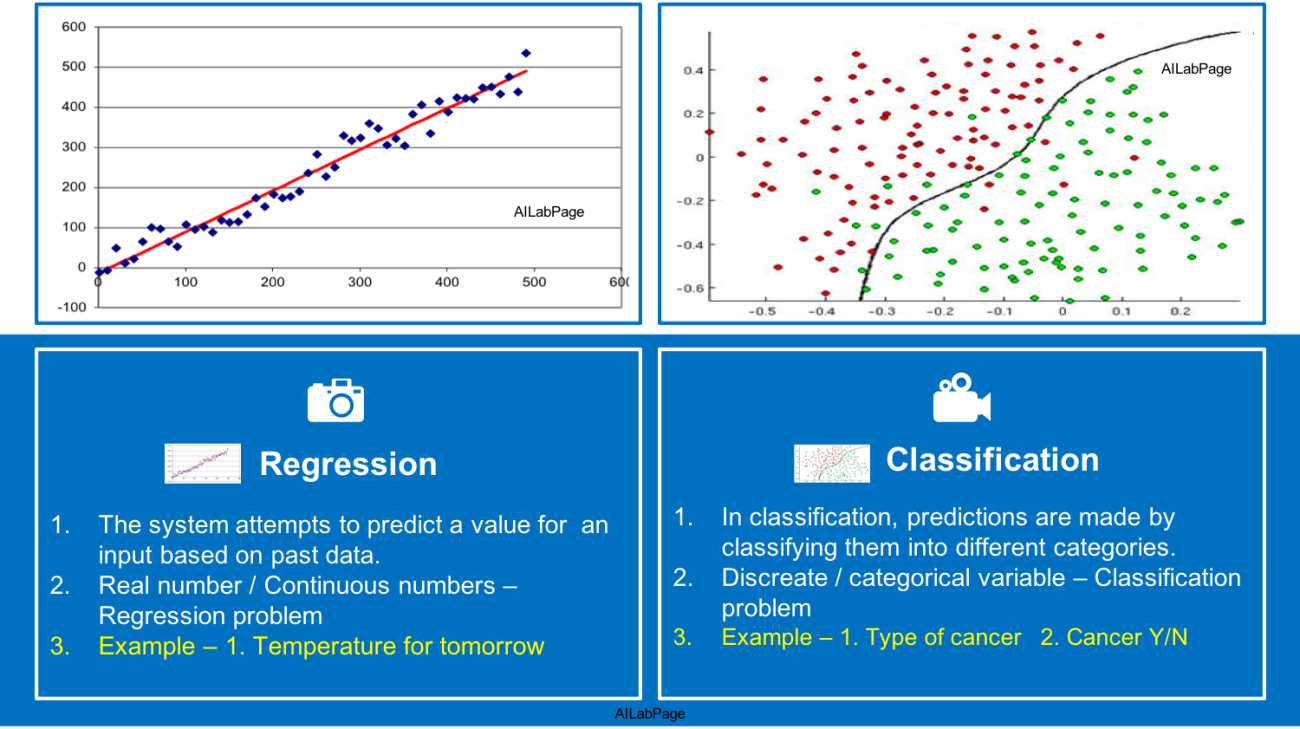

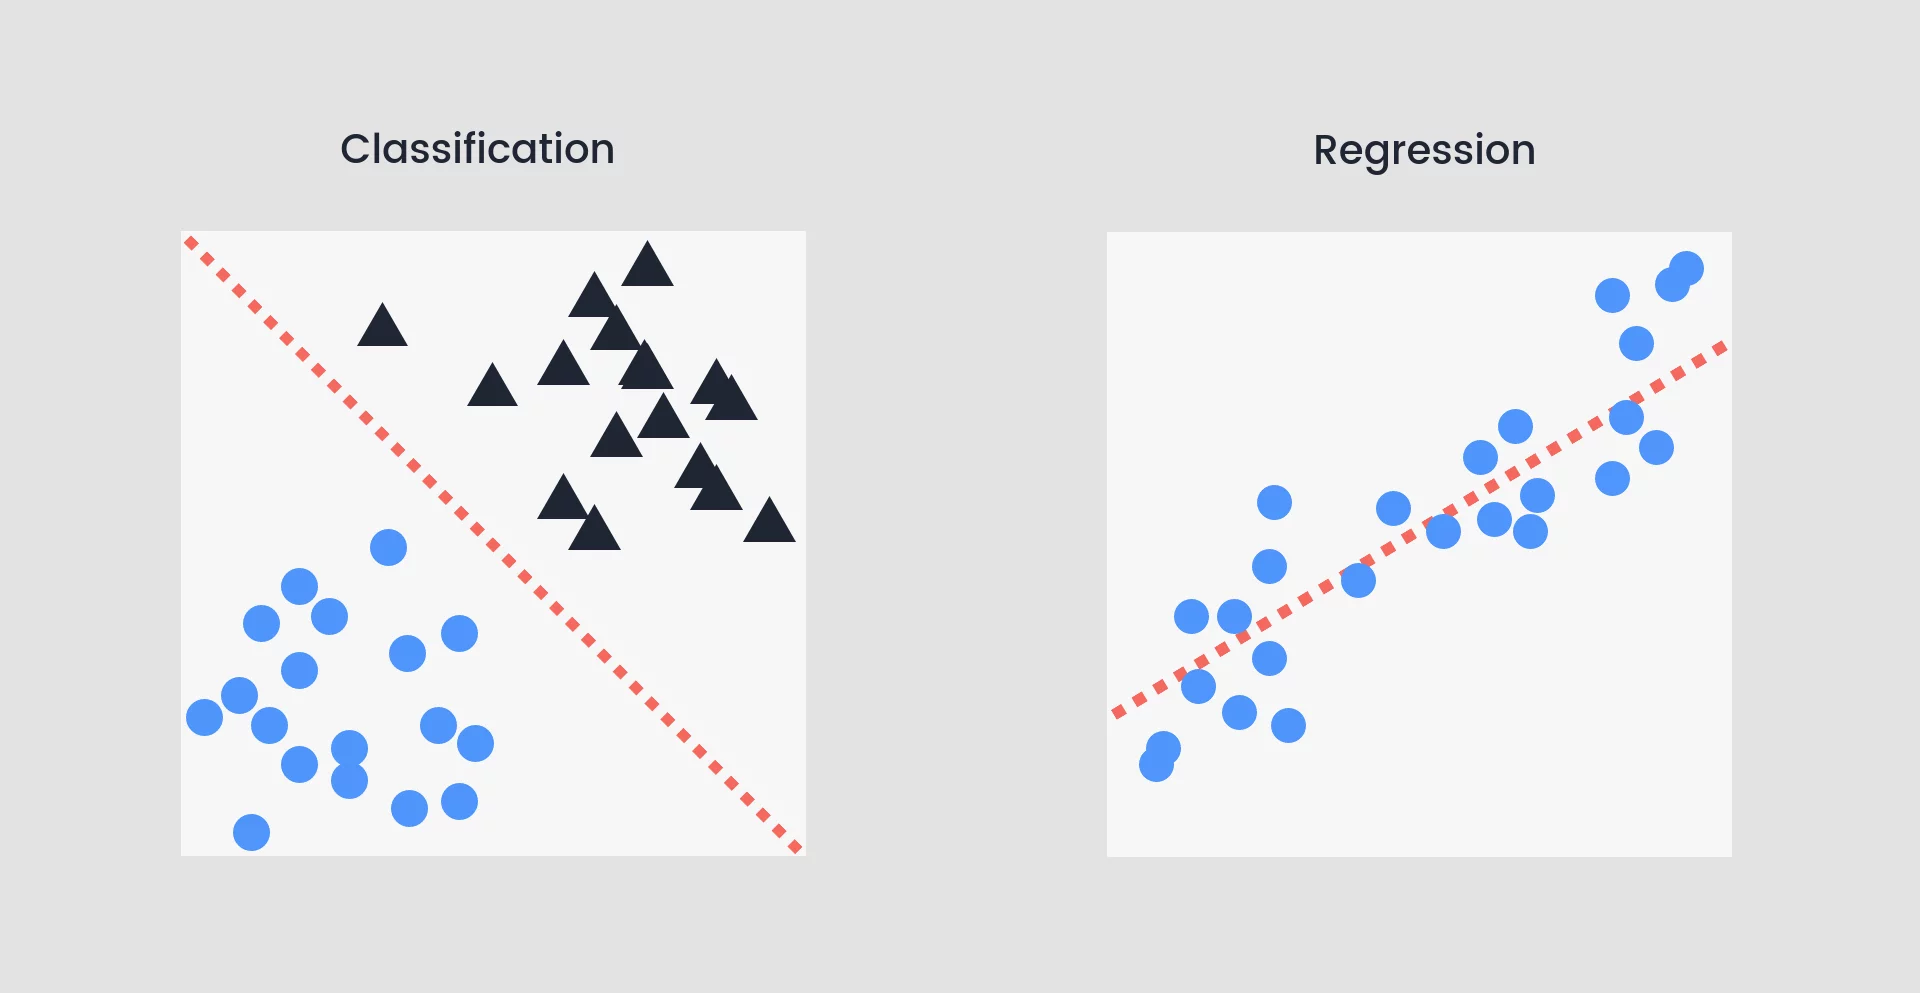

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing

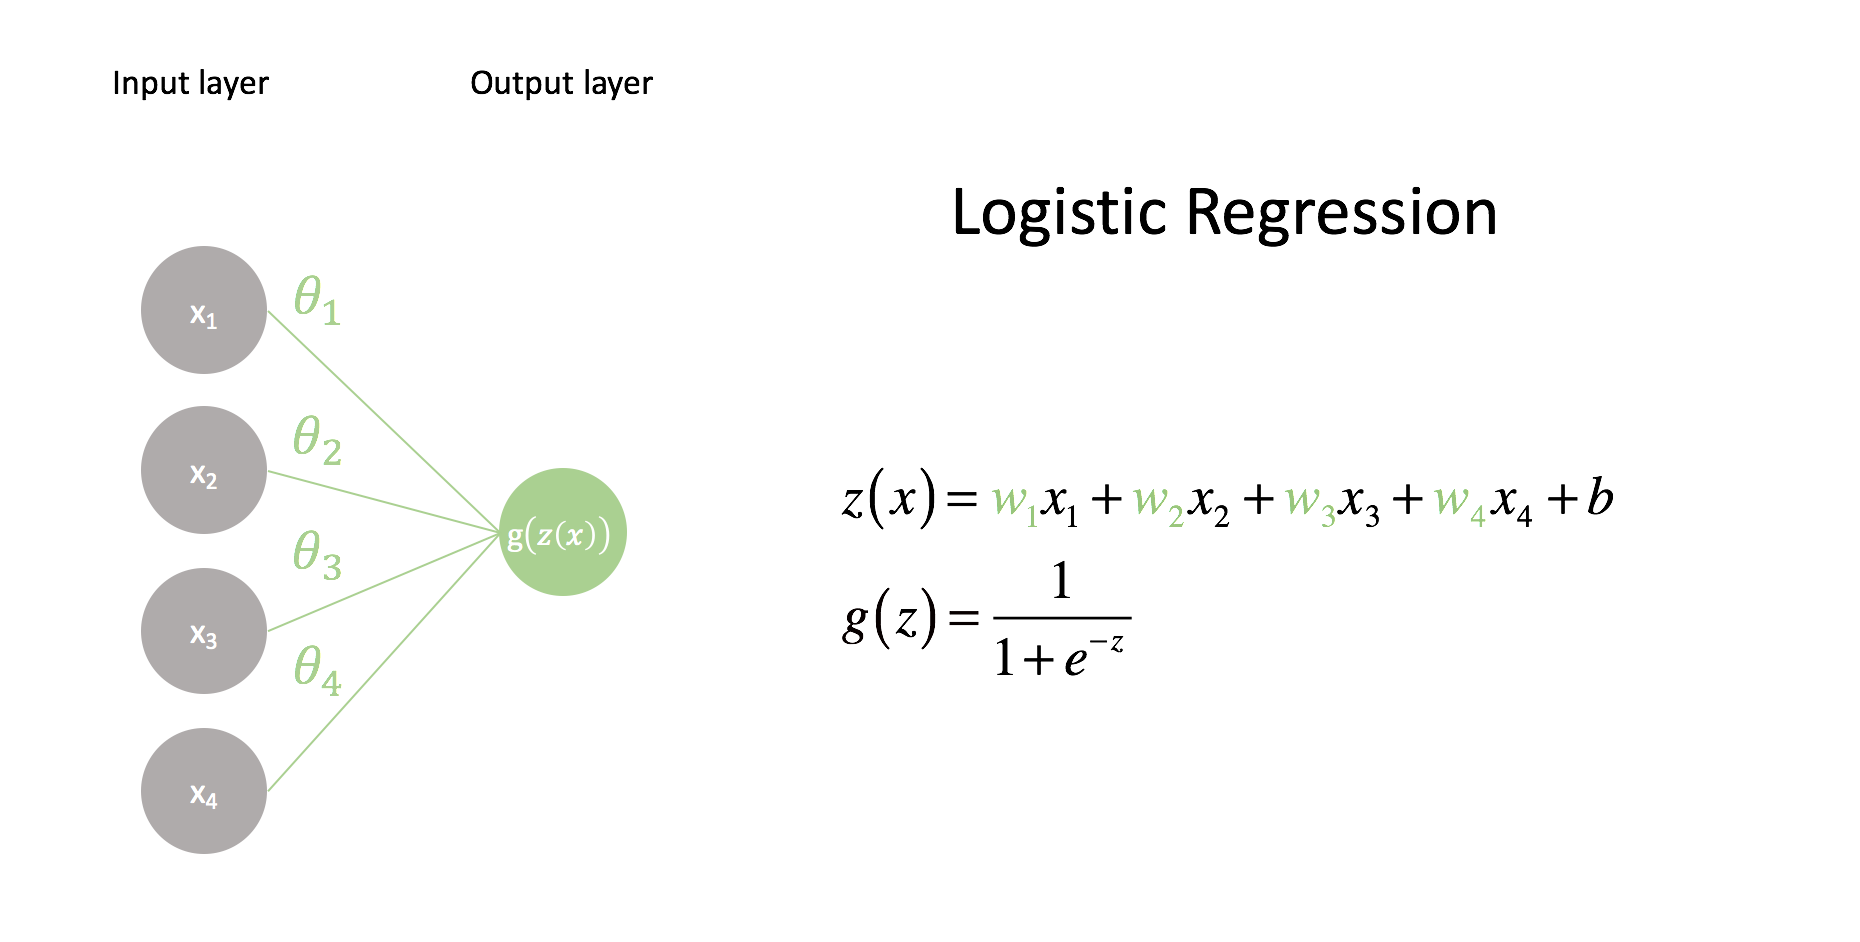

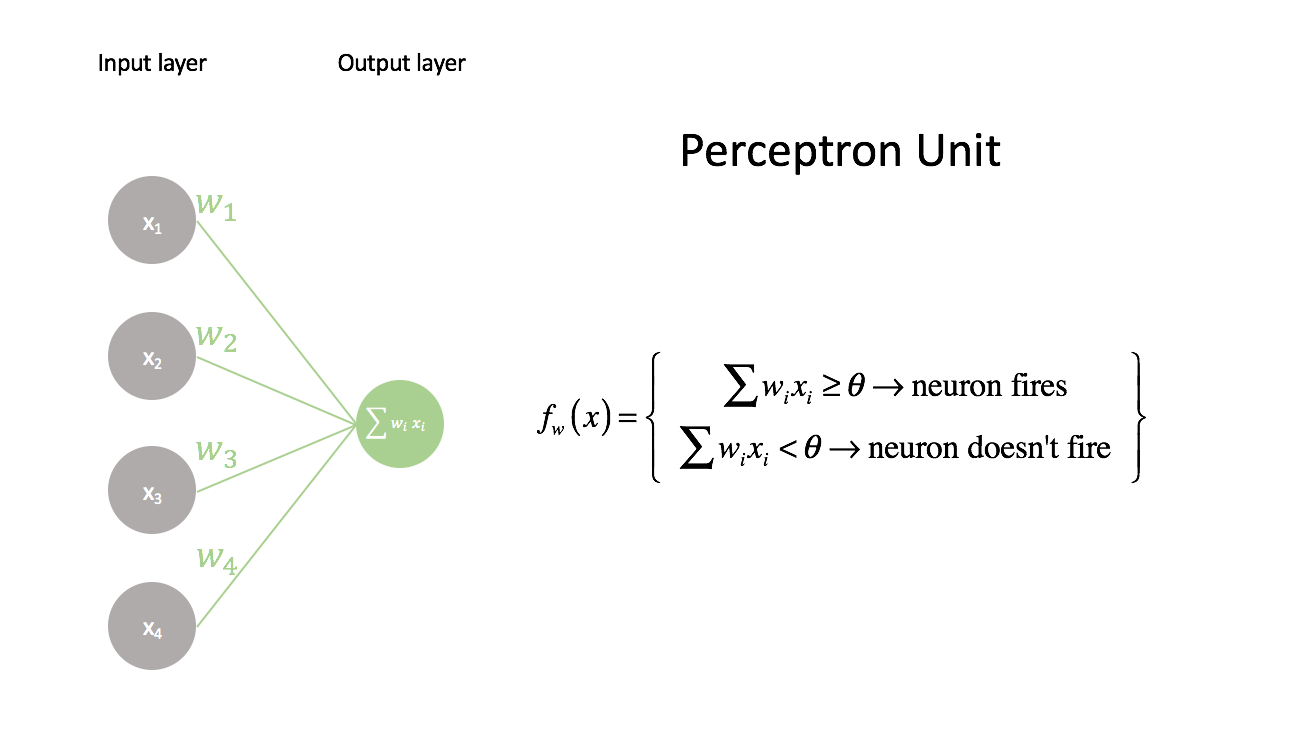

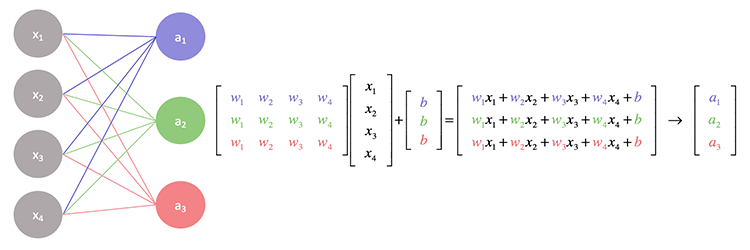

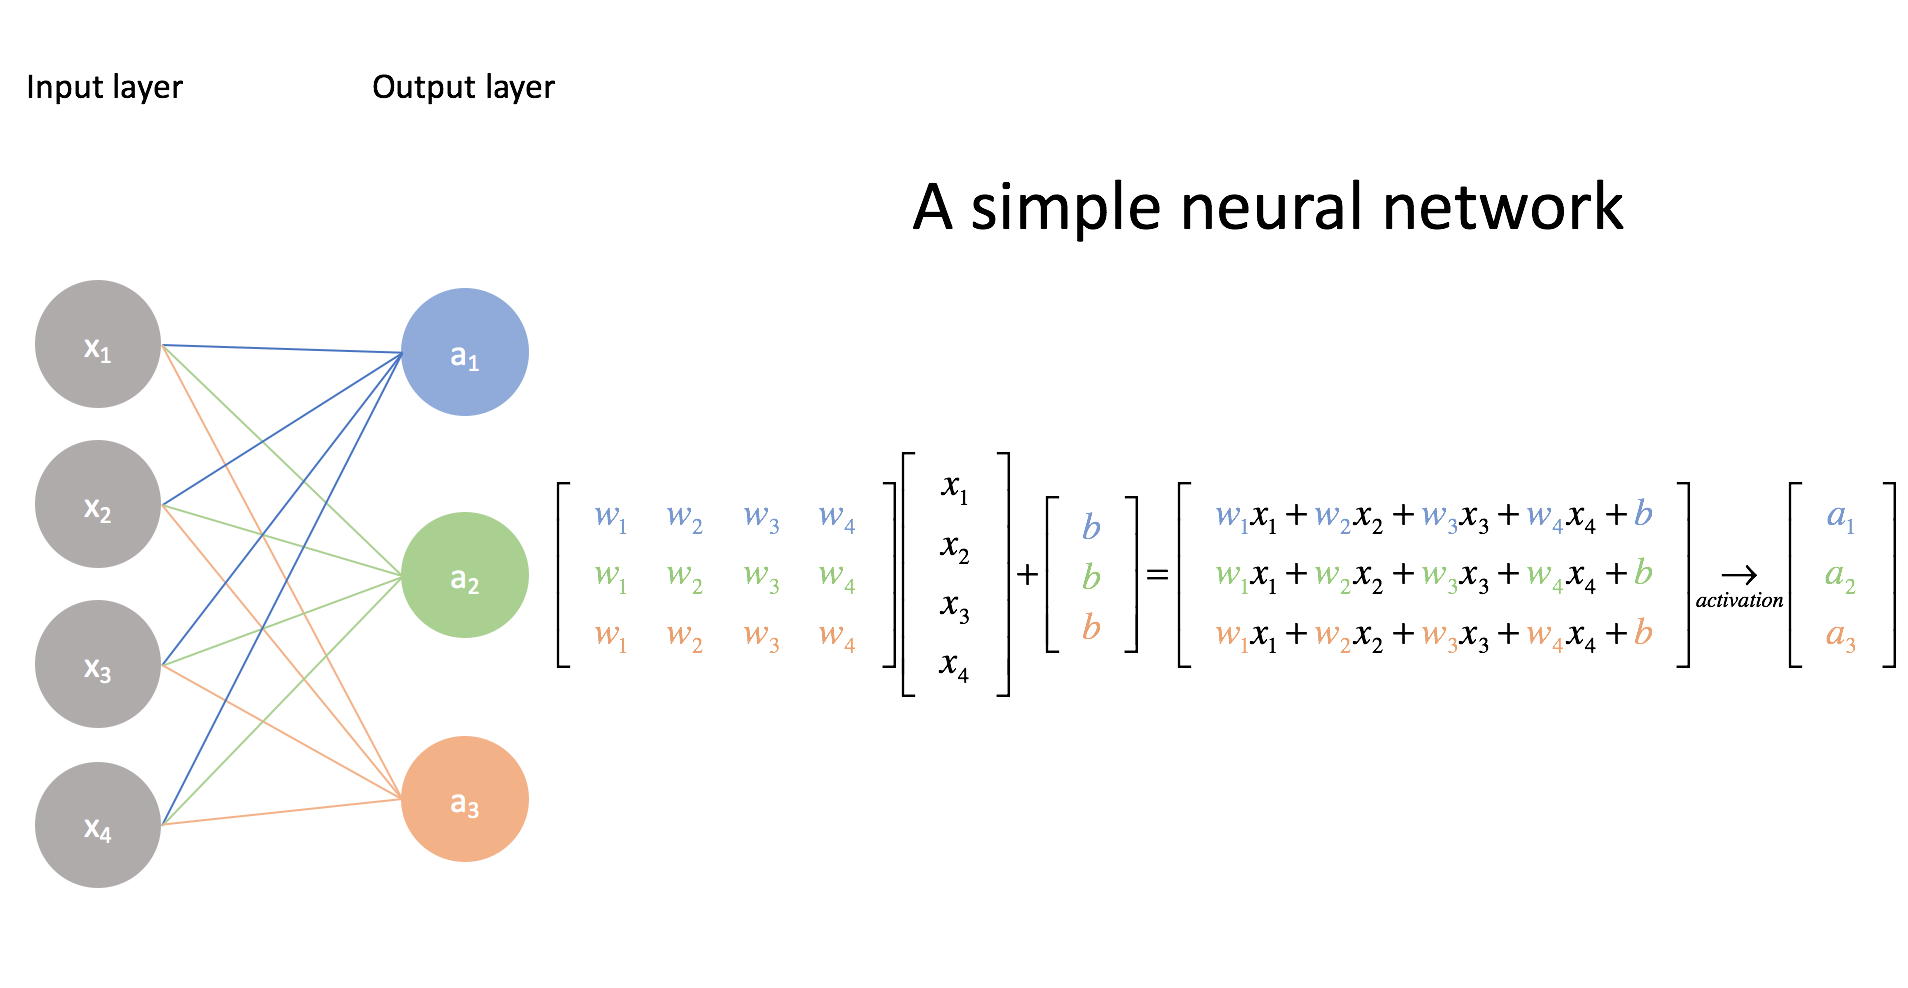

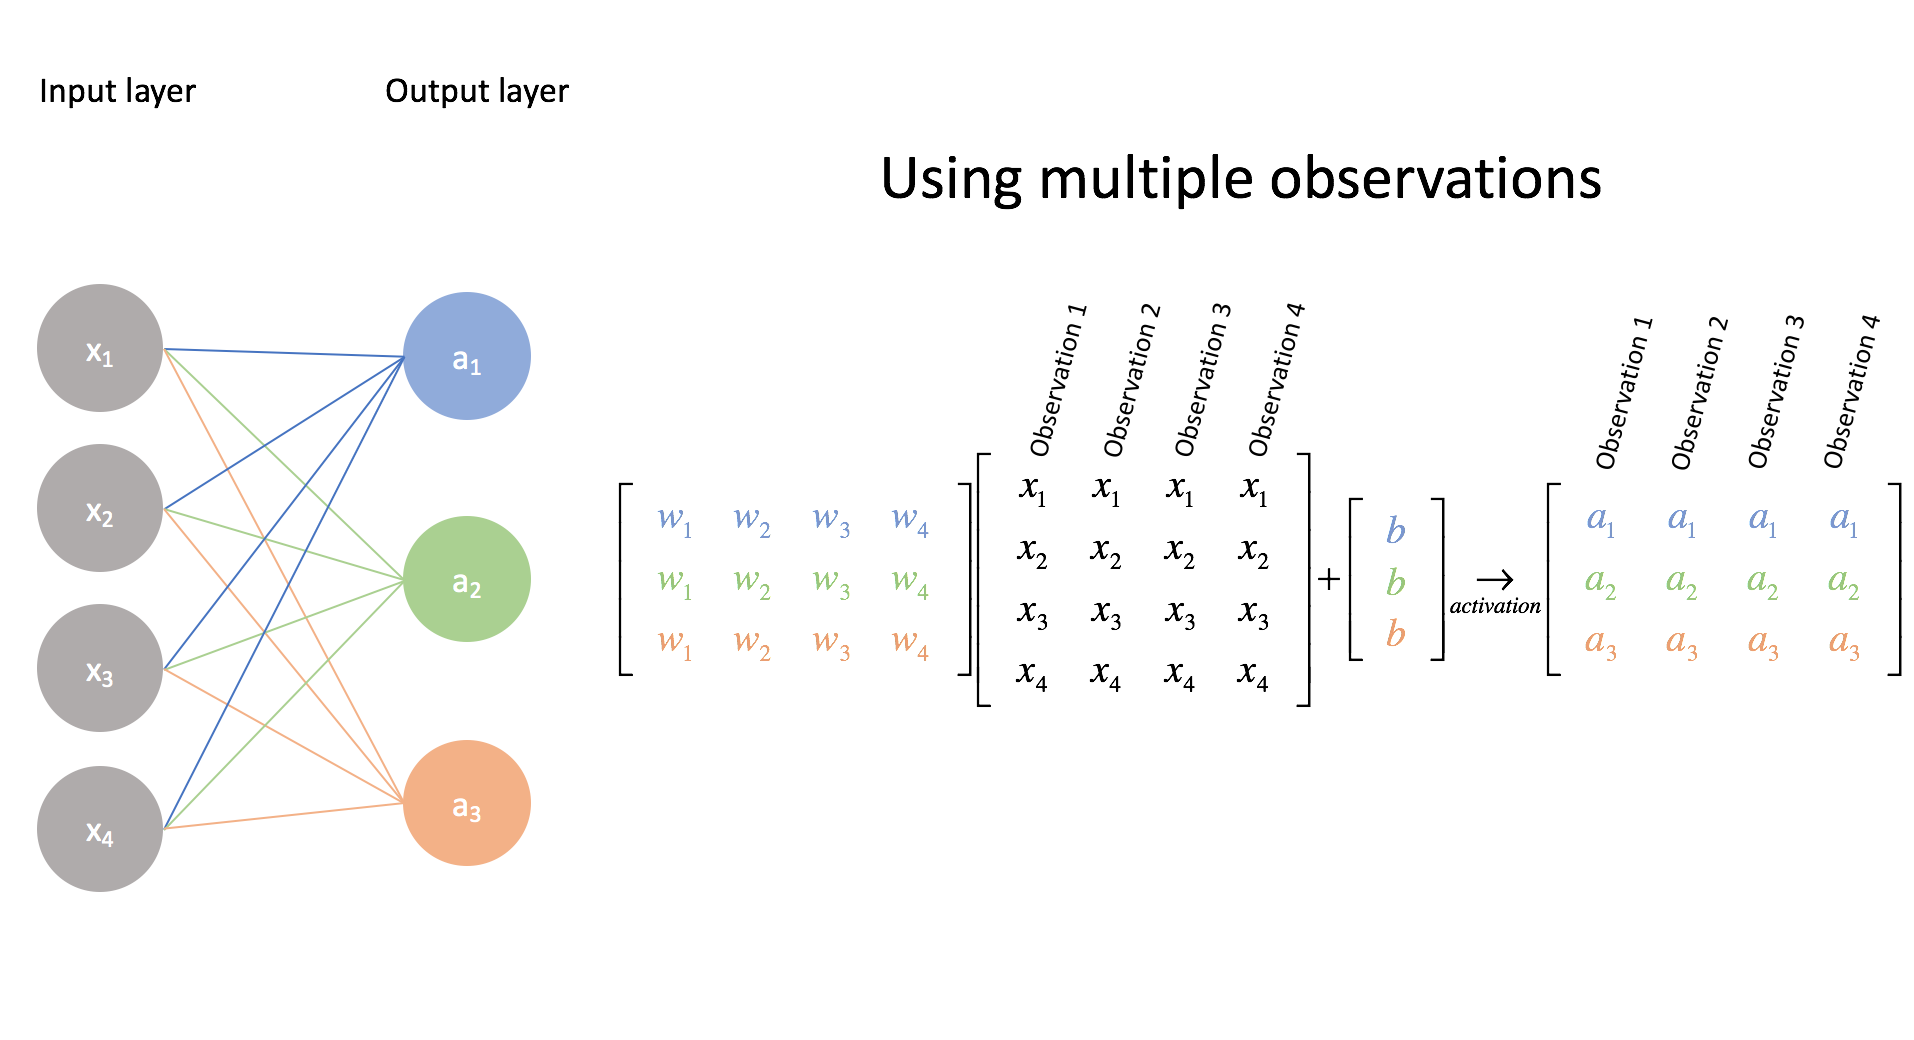

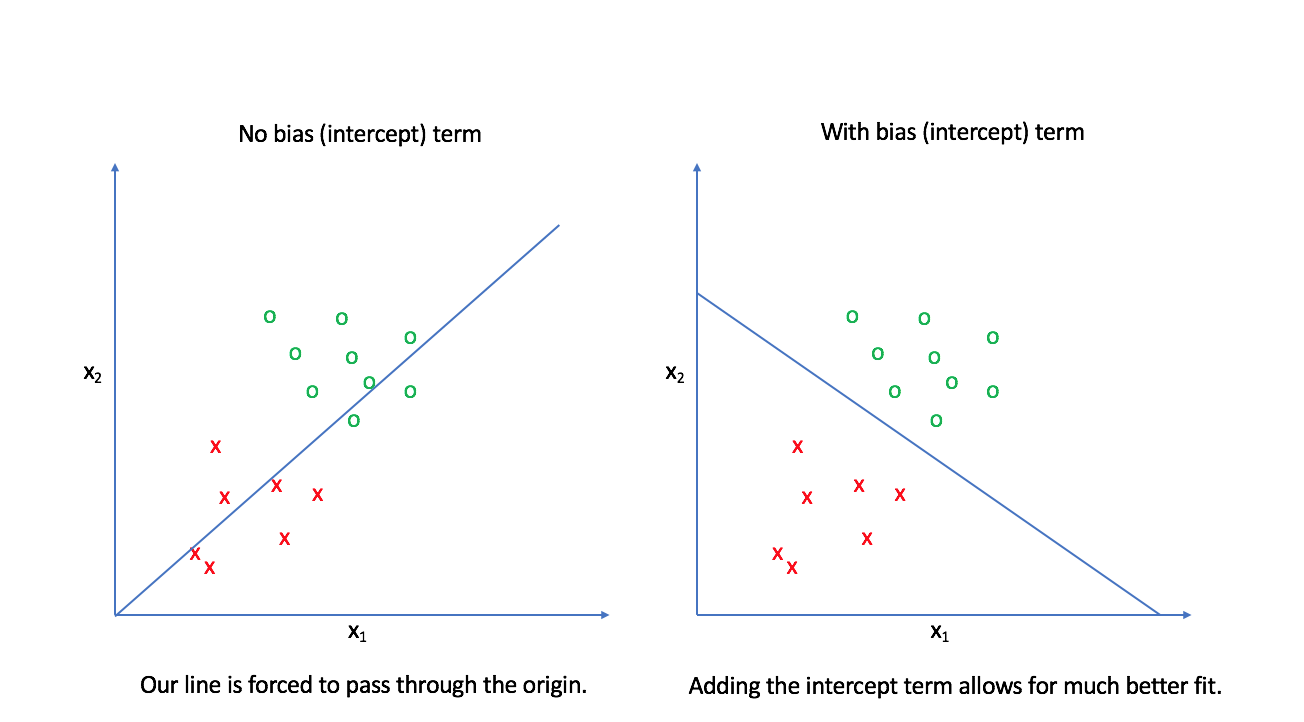

In [ ]:
!pip install git+https://github.com/williamedwardhahn/mpcr #imports
from mpcr import *
import numpy as np
import matplotlib.pyplot as plt
!pip install wget
import wget
import torch
import torch.nn as nn
from torch import tensor 
from torch.autograd import Variable
from torch import randn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-1g9cyzy_
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-1g9cyzy_
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# $y=mx+b$

In [ ]:
x = np.arange(0,9)

In [ ]:
x.shape

(9,)

In [ ]:
x = x[:,None]

In [ ]:
x.shape

(9, 1)

In [ ]:
y = 3*x-5

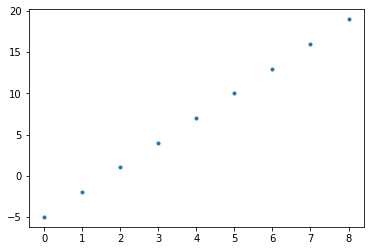

In [ ]:
plt.plot(x,y,'.')

##Solve Linear Fit Using Pytorch Gradient Descent

In [ ]:
x = torch.Tensor(x) # Convert the numpy vectors to pytorch tensors 
y = torch.Tensor(y)

In [ ]:
m = Variable(randn(1,1), requires_grad=True) # Initialize pytorch variables, i.e. values you want to optimize. In this case with normally distributed random numbers, one for m the slope and one for b the interscept
b = Variable(randn(1,1), requires_grad=True)

In [ ]:
learning_rate = 0.001 # Descend Gradient Slowly so as to Not Overshoot Minima and Oscillate

In [ ]:
for t in range(1000):

    y_pred = m * x + b  # Define Model 
    
    loss = (y_pred - y).pow(2).sum() # Define Loss Function as Sum of the Squares of the Differences 

    loss.backward() # Calculate Gradient, dLoss/dp for Each Parameter p 
    
    m.data -= learning_rate * m.grad.data # Gradient Descent
    b.data -= learning_rate * b.grad.data

    m.grad.zero_() # Reset Gradient Value
    b.grad.zero_()

    print(t, loss.item(),m.item(),b.item())

0 285.5152893066406 1.4636300802230835 0.33632683753967285
1 147.51852416992188 1.7062535285949707 0.3508915901184082
2 100.70529174804688 1.8488378524780273 0.3477253019809723
3 84.47992706298828 1.9334758520126343 0.33434993028640747
4 78.51891326904297 1.9845445156097412 0.3151213824748993
5 76.00582885742188 2.0161616802215576 0.29256200790405273
6 74.65440368652344 2.036503314971924 0.2681322395801544
7 73.69781494140625 2.050304412841797 0.24267761409282684
8 72.87879943847656 2.060307502746582 0.21668750047683716
9 72.11103820800781 2.0681004524230957 0.1904449760913849
10 71.36548614501953 2.074603319168091 0.16411373019218445
11 70.63239288330078 2.0803489685058594 0.13778823614120483
12 69.908447265625 2.085645914077759 0.11152292042970657
13 69.19244384765625 2.090672731399536 0.08534900099039078
14 68.48394775390625 2.0955331325531006 0.059284280985593796
15 67.78276062011719 2.1002871990203857 0.03333877772092819
16 67.08877563476562 2.1049697399139404 0.007518006488680839

In [ ]:
loss.item()

0.002712017623707652

In [ ]:
m.item()

2.994309902191162

In [ ]:
b.item()

-4.968161582946777

# Pytorch Linear Model

In [ ]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.01

In [ ]:
# Linear regression model
model = nn.Linear(input_size, output_size)

In [ ]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [ ]:
# Convert numpy arrays to torch tensors
inputs = x
targets = y

In [ ]:
# Train the model
for epoch in range(num_epochs):
    
    
    # Forward pass
    outputs = model(inputs)
    
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    print(epoch+1, num_epochs, loss.item())


1 1000 58.65403366088867
2 1000 22.377197265625
3 1000 12.030294418334961
4 1000 9.033119201660156
5 1000 8.11971378326416
6 1000 7.797613143920898
7 1000 7.64381742477417
8 1000 7.538431644439697
9 1000 7.44747257232666
10 1000 7.361292362213135
11 1000 7.277156352996826
12 1000 7.194277286529541
13 1000 7.112427711486816
14 1000 7.031530857086182
15 1000 6.951562881469727
16 1000 6.872506141662598
17 1000 6.794346809387207
18 1000 6.7170796394348145
19 1000 6.640688896179199
20 1000 6.5651679039001465
21 1000 6.490506172180176
22 1000 6.416692733764648
23 1000 6.343718528747559
24 1000 6.271574974060059
25 1000 6.200251579284668
26 1000 6.129739761352539
27 1000 6.06002950668335
28 1000 5.991110324859619
29 1000 5.922976493835449
30 1000 5.855618000030518
31 1000 5.789025783538818
32 1000 5.7231903076171875
33 1000 5.658102512359619
34 1000 5.593756198883057
35 1000 5.530141830444336
36 1000 5.467250823974609
37 1000 5.405073642730713
38 1000 5.343604564666748
39 1000 5.2828345298767

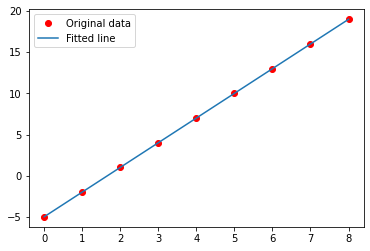

In [ ]:
# Plot the graph
predicted = model(inputs).detach().numpy()


plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, predicted, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
model

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
model.weight

Parameter containing:
tensor([[2.9969]], requires_grad=True)

In [ ]:
model.bias

Parameter containing:
tensor([-4.9827], requires_grad=True)

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def plot(x): #one hot
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [ ]:
def plotfc(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'cool')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.colorbar(im)
    plt.show()

In [ ]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [ ]:
# #MNIST
#train_set = datasets.MNIST('./data', train=True, download=True)
#test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
train_set = datasets.KMNIST('./data', train=True, download=True)
test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
#train_set = datasets.FashionMNIST('./data', train=True, download=True)
#test_set = datasets.FashionMNIST('./data', train=False, download=True)

  0%|          | 0/18165135 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/train-images-idx3-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/29497 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/3041136 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/5120 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/KMNIST/raw



In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [ ]:
X.shape #tells us the dimensions of the dataset 

(60000, 1, 28, 28)

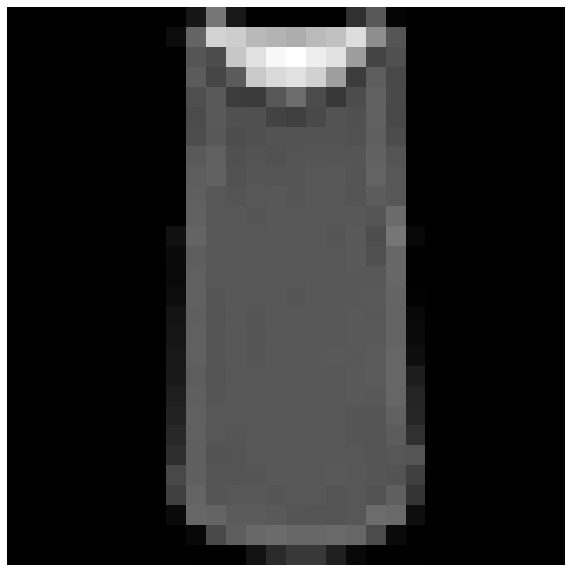

In [ ]:
plot(X[2,0,:,:]) #first number is the nth number we want to see, this is how we tell the program what we want to see

In [ ]:
Y[123]

2

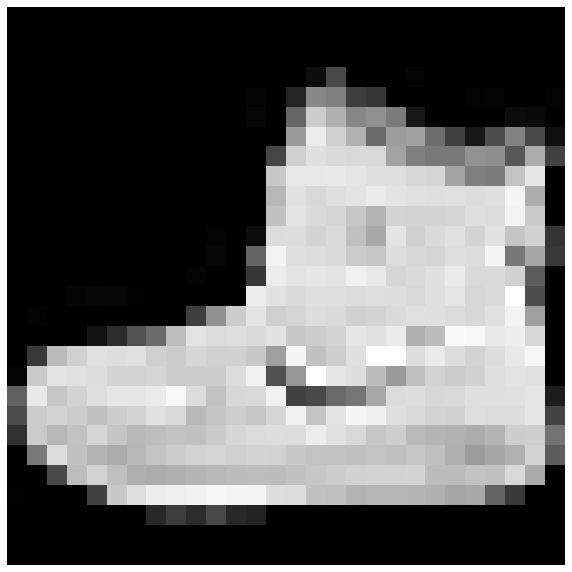

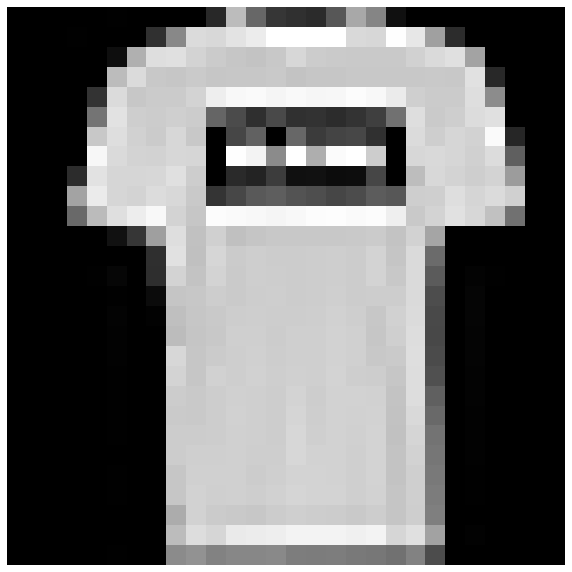

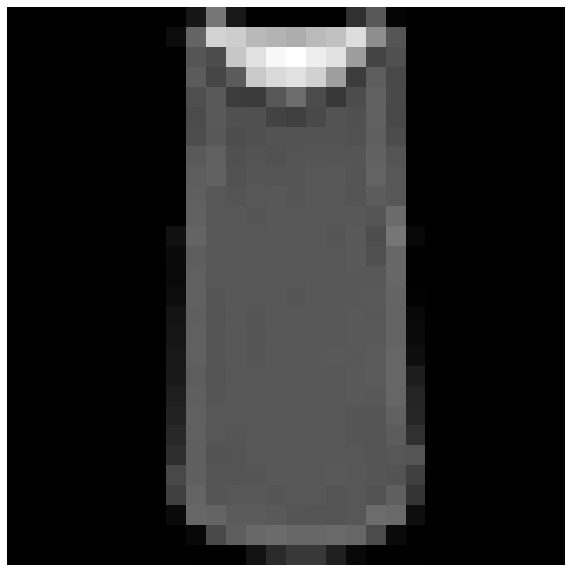

In [ ]:
for i in range(3):
    plot(X[i,0,:,:])

In [ ]:
Y

array([9, 0, 0, ..., 3, 0, 5])

In [ ]:
X[0:25,0,:,:].shape

(25, 28, 28)

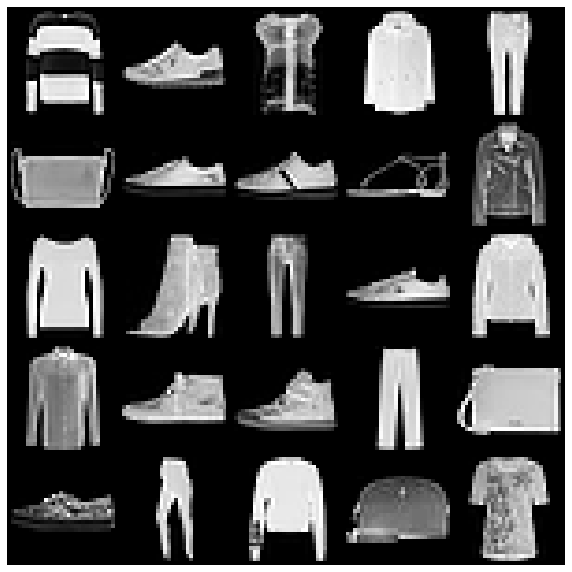

In [ ]:
montage_plot(X[125:150,0,:,:])

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape

(10000, 1, 28, 28)

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape[0]

10000

In [ ]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [ ]:
X.shape,X_test.shape

((60000, 784), (10000, 784))

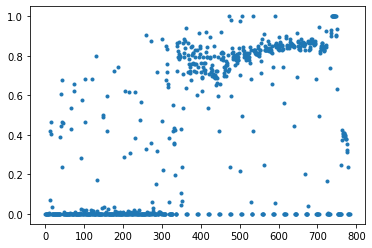

In [ ]:
plt.plot(X[100],'.')

(array([386.,   8.,  21.,  10.,  16.,   8.,  30.,  72., 187.,  46.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

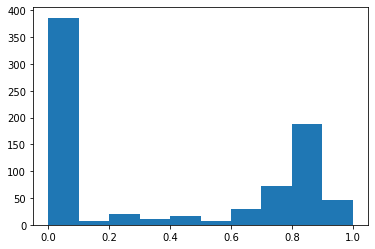

In [ ]:
plt.hist(X[0])

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
url = 'https://github.com/williamedwardhahn/ComplexSystems/raw/main/W.data'  
wget.download(url,"W.data")

'W (2).data'

In [ ]:
W = torch.load("W.data")

In [ ]:
W.shape #784 rows, 10 columns

torch.Size([784, 10])

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 100)
    plt.show()

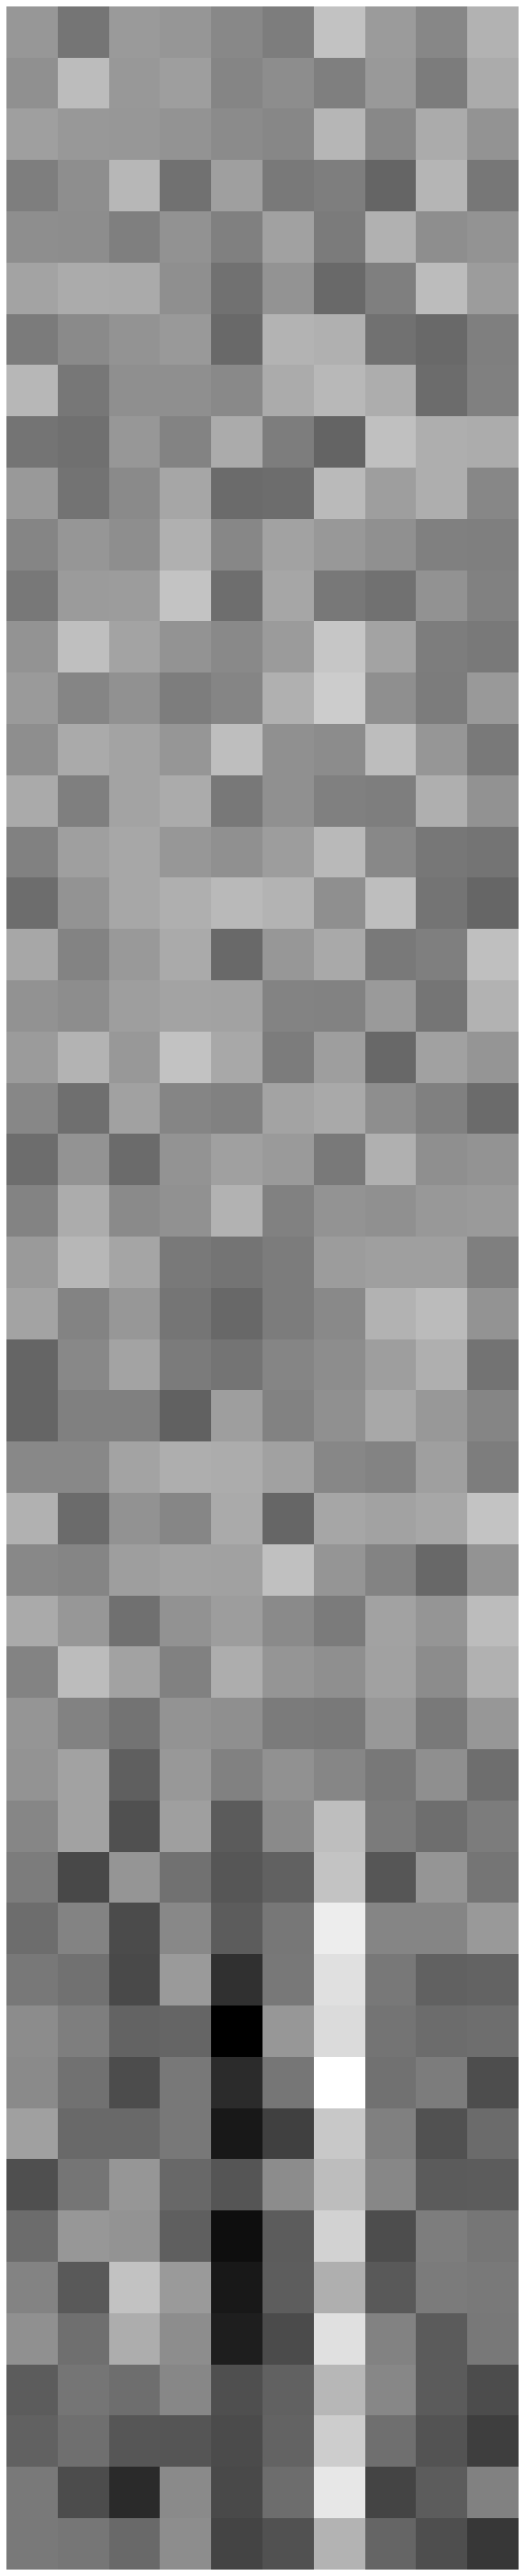

In [ ]:
plot(W[0:50,:10])

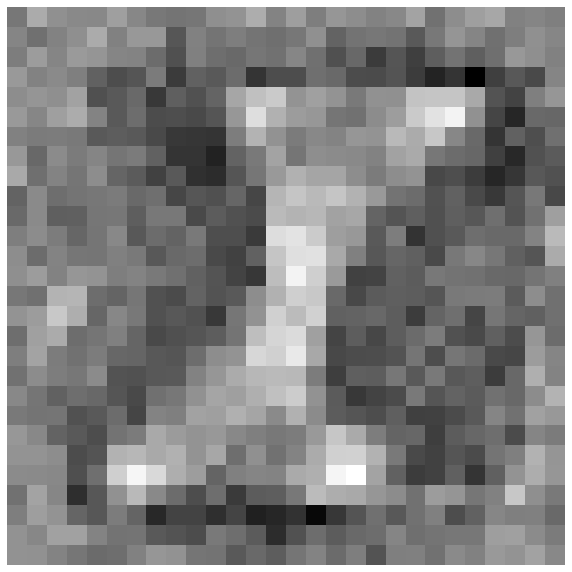

In [ ]:
plot(W[:,1].reshape(28,28))

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
b = 1000

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
x,y = get_batch('train')

In [ ]:
x.shape

torch.Size([1000, 784])

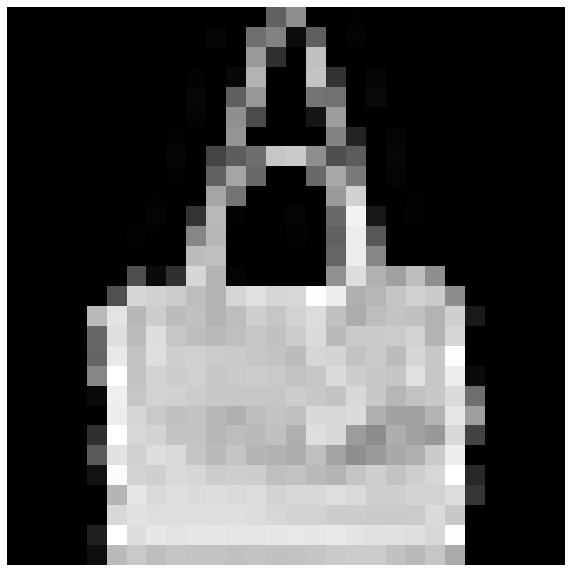

In [ ]:
plot(x[0].reshape(28,28))

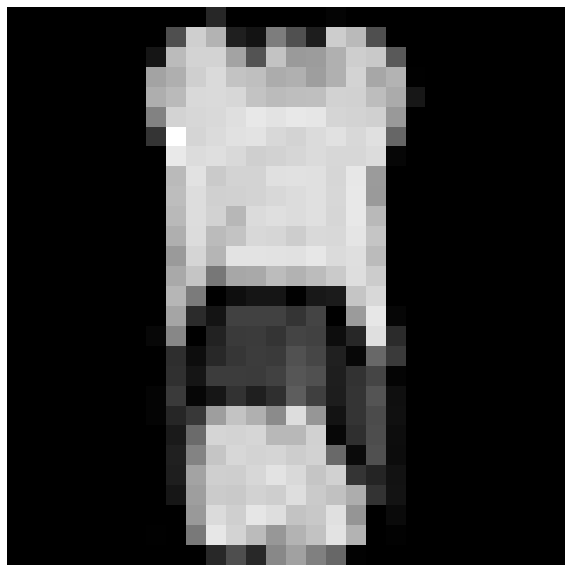

In [ ]:
plot(x[1].reshape(28,28))

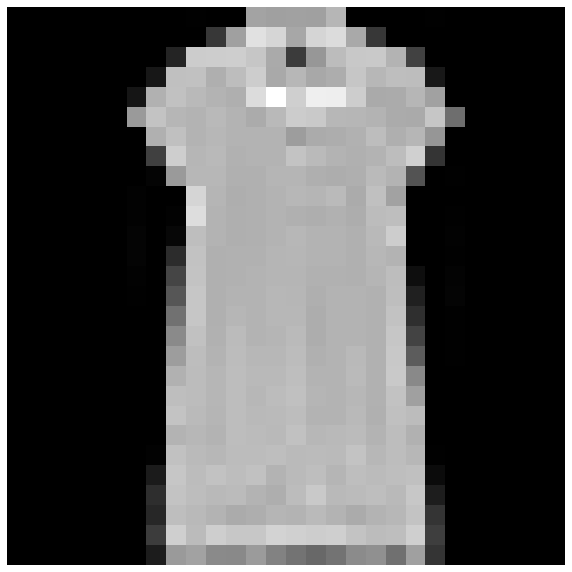

In [ ]:
plot(x[2].reshape(28,28))

In [ ]:
y

tensor([8., 3., 3., 0., 6., 9., 8., 6., 1., 7., 2., 8., 3., 8., 1., 5., 0., 6.,
        5., 6., 1., 7., 5., 8., 8., 9., 7., 7., 9., 5., 9., 4., 5., 3., 9., 0.,
        5., 8., 1., 0., 8., 6., 7., 5., 0., 4., 0., 9., 0., 6., 6., 4., 1., 6.,
        1., 5., 0., 4., 4., 2., 2., 5., 5., 9., 3., 4., 4., 7., 4., 2., 7., 7.,
        1., 8., 7., 6., 4., 3., 1., 7., 6., 2., 2., 4., 1., 5., 7., 1., 3., 6.,
        1., 7., 1., 3., 7., 0., 3., 7., 0., 7., 5., 1., 9., 1., 1., 0., 7., 8.,
        5., 9., 9., 4., 0., 4., 7., 8., 8., 8., 1., 6., 0., 6., 7., 1., 4., 7.,
        7., 8., 6., 9., 1., 6., 2., 3., 3., 1., 9., 6., 2., 3., 1., 5., 2., 5.,
        9., 6., 3., 9., 5., 5., 0., 3., 7., 2., 7., 6., 5., 6., 9., 0., 7., 1.,
        9., 0., 0., 2., 2., 7., 9., 1., 1., 3., 9., 7., 5., 3., 6., 6., 2., 0.,
        8., 2., 7., 7., 3., 8., 1., 8., 5., 9., 9., 2., 1., 3., 3., 5., 6., 9.,
        1., 6., 4., 9., 4., 3., 4., 9., 7., 0., 1., 0., 4., 8., 9., 8., 5., 6.,
        1., 4., 3., 7., 1., 7., 6., 7., 

In [ ]:
x.shape, W.shape #1000 samples of data. data has 784 inputs

(torch.Size([1000, 784]), torch.Size([784, 10]))

In [ ]:
torch.matmul(x,W).shape

torch.Size([1000, 10])

In [ ]:
(x@W).shape

torch.Size([1000, 10])

In [ ]:
%%timeit
x@W

20.6 µs ± 235 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
X@W

tensor([[ -9.1355, -26.5981,   5.1709,  ..., -29.5724, -15.9528, -30.1074],
        [-28.9095, -42.6421, -18.8967,  ..., -11.8924, -18.0746, -21.6941],
        [ -7.1658, -10.6776,  -1.3747,  ...,  -4.1579,  -5.6479,  -3.0956],
        ...,
        [-13.8366, -21.5116,  -3.3438,  ...,  -2.4351,  -7.5723,  -4.4591],
        [ -7.7420, -15.5898,  -9.8953,  ...,  -2.0989,  -6.3501,  -7.9436],
        [ -1.9665,  -8.2239,   4.0209,  ...,  -5.0965,  -8.9947,  -6.2918]],
       device='cuda:0', grad_fn=<MmBackward0>)

https://eleif.net/clicktimer.html

In [ ]:
x@W

tensor([[-15.1553, -27.7882,  -4.1003,  ...,  -2.6604, -24.2422,   1.3225],
        [-10.5522, -18.9616,  -6.6992,  ...,   0.8264,  -7.4825,  -4.6511],
        [-16.2581, -22.3069,  -4.0124,  ...,  -6.0483, -13.0059,  -5.4943],
        ...,
        [ -7.9069, -14.8446,  -3.2877,  ..., -11.4728, -10.9047,  -7.8073],
        [ -8.1179, -24.9430,  -3.0024,  ..., -14.5454, -12.1218, -15.1850],
        [-11.3155, -31.2217,  -3.0425,  ..., -11.0254, -16.3846,  -9.5402]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
y2 = x@W  #think of this as y=mx

In [ ]:
y2.shape

torch.Size([1000, 10])

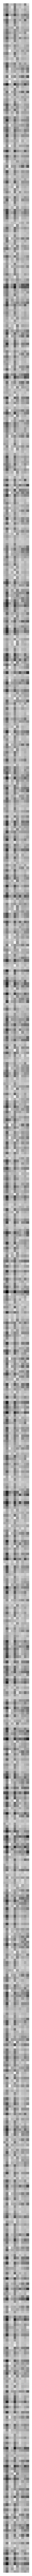

In [ ]:
plot(y2)

In [ ]:
y

tensor([8., 3., 3., 0., 6., 9., 8., 6., 1., 7., 2., 8., 3., 8., 1., 5., 0., 6.,
        5., 6., 1., 7., 5., 8., 8., 9., 7., 7., 9., 5., 9., 4., 5., 3., 9., 0.,
        5., 8., 1., 0., 8., 6., 7., 5., 0., 4., 0., 9., 0., 6., 6., 4., 1., 6.,
        1., 5., 0., 4., 4., 2., 2., 5., 5., 9., 3., 4., 4., 7., 4., 2., 7., 7.,
        1., 8., 7., 6., 4., 3., 1., 7., 6., 2., 2., 4., 1., 5., 7., 1., 3., 6.,
        1., 7., 1., 3., 7., 0., 3., 7., 0., 7., 5., 1., 9., 1., 1., 0., 7., 8.,
        5., 9., 9., 4., 0., 4., 7., 8., 8., 8., 1., 6., 0., 6., 7., 1., 4., 7.,
        7., 8., 6., 9., 1., 6., 2., 3., 3., 1., 9., 6., 2., 3., 1., 5., 2., 5.,
        9., 6., 3., 9., 5., 5., 0., 3., 7., 2., 7., 6., 5., 6., 9., 0., 7., 1.,
        9., 0., 0., 2., 2., 7., 9., 1., 1., 3., 9., 7., 5., 3., 6., 6., 2., 0.,
        8., 2., 7., 7., 3., 8., 1., 8., 5., 9., 9., 2., 1., 3., 3., 5., 6., 9.,
        1., 6., 4., 9., 4., 3., 4., 9., 7., 0., 1., 0., 4., 8., 9., 8., 5., 6.,
        1., 4., 3., 7., 1., 7., 6., 7., 

In [ ]:
one_hot(y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


tensor([[0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


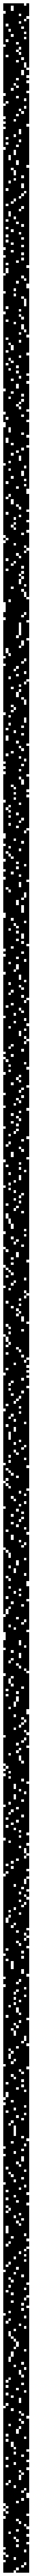

In [ ]:
plot(one_hot(y))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


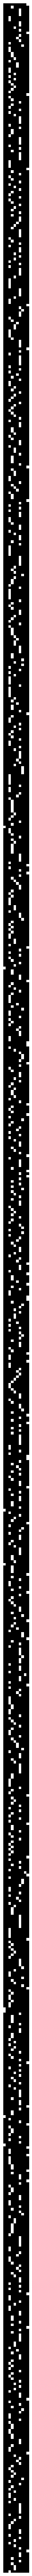

In [ ]:
plot(one_hot(torch.argmax(y2,1))) #think of this like a scantron showing the values

In [ ]:
y

tensor([8., 3., 3., 0., 6., 9., 8., 6., 1., 7., 2., 8., 3., 8., 1., 5., 0., 6.,
        5., 6., 1., 7., 5., 8., 8., 9., 7., 7., 9., 5., 9., 4., 5., 3., 9., 0.,
        5., 8., 1., 0., 8., 6., 7., 5., 0., 4., 0., 9., 0., 6., 6., 4., 1., 6.,
        1., 5., 0., 4., 4., 2., 2., 5., 5., 9., 3., 4., 4., 7., 4., 2., 7., 7.,
        1., 8., 7., 6., 4., 3., 1., 7., 6., 2., 2., 4., 1., 5., 7., 1., 3., 6.,
        1., 7., 1., 3., 7., 0., 3., 7., 0., 7., 5., 1., 9., 1., 1., 0., 7., 8.,
        5., 9., 9., 4., 0., 4., 7., 8., 8., 8., 1., 6., 0., 6., 7., 1., 4., 7.,
        7., 8., 6., 9., 1., 6., 2., 3., 3., 1., 9., 6., 2., 3., 1., 5., 2., 5.,
        9., 6., 3., 9., 5., 5., 0., 3., 7., 2., 7., 6., 5., 6., 9., 0., 7., 1.,
        9., 0., 0., 2., 2., 7., 9., 1., 1., 3., 9., 7., 5., 3., 6., 6., 2., 0.,
        8., 2., 7., 7., 3., 8., 1., 8., 5., 9., 9., 2., 1., 3., 3., 5., 6., 9.,
        1., 6., 4., 9., 4., 3., 4., 9., 7., 0., 1., 0., 4., 8., 9., 8., 5., 6.,
        1., 4., 3., 7., 1., 7., 6., 7., 

In [ ]:
torch.argmax(y2,1)

tensor([9, 3, 6, 6, 6, 2, 2, 6, 6, 4, 6, 9, 6, 5, 6, 2, 7, 2, 2, 3, 3, 4, 2, 5,
        5, 2, 2, 4, 2, 4, 2, 3, 4, 3, 2, 9, 2, 3, 6, 3, 2, 6, 2, 4, 6, 6, 6, 2,
        6, 3, 3, 2, 6, 6, 6, 2, 6, 3, 6, 6, 6, 2, 2, 2, 9, 3, 6, 2, 3, 6, 2, 4,
        6, 3, 2, 6, 2, 3, 6, 4, 3, 6, 3, 6, 6, 5, 4, 3, 6, 6, 6, 2, 3, 6, 2, 6,
        6, 4, 6, 4, 2, 6, 2, 6, 6, 6, 4, 2, 2, 2, 2, 6, 6, 6, 4, 2, 2, 9, 6, 7,
        6, 6, 2, 3, 5, 4, 4, 2, 2, 2, 3, 6, 6, 6, 9, 6, 2, 6, 6, 6, 6, 2, 6, 2,
        5, 3, 6, 2, 2, 4, 3, 6, 4, 3, 2, 6, 4, 3, 2, 3, 4, 6, 2, 6, 6, 3, 3, 4,
        2, 3, 6, 6, 2, 4, 4, 6, 3, 3, 3, 6, 9, 3, 4, 4, 2, 2, 6, 3, 4, 5, 2, 3,
        3, 9, 6, 2, 6, 2, 6, 6, 2, 2, 3, 6, 6, 2, 4, 6, 6, 3, 6, 2, 2, 2, 2, 6,
        6, 6, 6, 4, 3, 4, 7, 4, 3, 3, 2, 6, 2, 2, 2, 2, 6, 3, 2, 3, 6, 6, 4, 3,
        2, 6, 2, 3, 3, 3, 4, 5, 4, 4, 6, 6, 6, 3, 3, 7, 4, 7, 2, 6, 2, 4, 2, 2,
        2, 6, 2, 2, 2, 2, 4, 3, 5, 3, 3, 6, 9, 3, 2, 2, 6, 4, 6, 3, 2, 3, 6, 2,
        2, 6, 4, 6, 6, 6, 5, 6, 4, 7, 7,

In [ ]:
torch.sum(y == torch.argmax(y2,1))/b

tensor(0.0780, device='cuda:0')

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
X@W

tensor([[ -9.1355, -26.5981,   5.1709,  ..., -29.5724, -15.9528, -30.1074],
        [-28.9095, -42.6421, -18.8967,  ..., -11.8924, -18.0746, -21.6941],
        [ -7.1658, -10.6776,  -1.3747,  ...,  -4.1579,  -5.6479,  -3.0956],
        ...,
        [-13.8366, -21.5116,  -3.3438,  ...,  -2.4351,  -7.5723,  -4.4591],
        [ -7.7420, -15.5898,  -9.8953,  ...,  -2.0989,  -6.3501,  -7.9436],
        [ -1.9665,  -8.2239,   4.0209,  ...,  -5.0965,  -8.9947,  -6.2918]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
torch.argmax(X@W,1)

tensor([2, 6, 6,  ..., 6, 6, 2], device='cuda:0')

In [ ]:
Y

tensor([9., 0., 0.,  ..., 3., 0., 5.], device='cuda:0')

In [ ]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

tensor(0.0777, device='cuda:0')

In [ ]:
X@W

tensor([[ -9.1355, -26.5981,   5.1709,  ..., -29.5724, -15.9528, -30.1074],
        [-28.9095, -42.6421, -18.8967,  ..., -11.8924, -18.0746, -21.6941],
        [ -7.1658, -10.6776,  -1.3747,  ...,  -4.1579,  -5.6479,  -3.0956],
        ...,
        [-13.8366, -21.5116,  -3.3438,  ...,  -2.4351,  -7.5723,  -4.4591],
        [ -7.7420, -15.5898,  -9.8953,  ...,  -2.0989,  -6.3501,  -7.9436],
        [ -1.9665,  -8.2239,   4.0209,  ...,  -5.0965,  -8.9947,  -6.2918]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
W[:,0].shape

torch.Size([784])

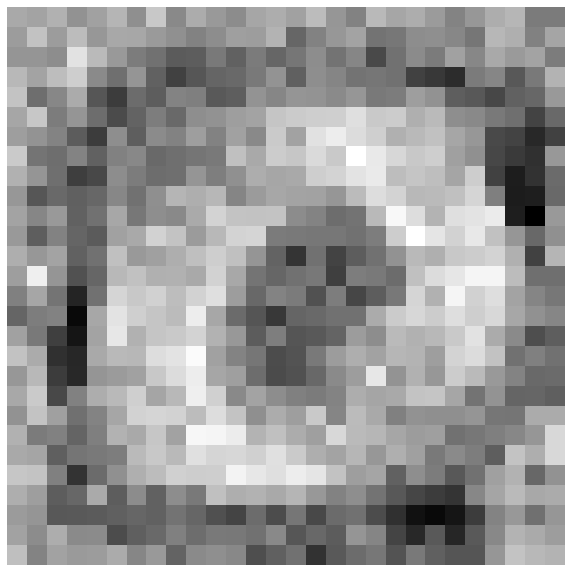

In [ ]:
plot(W[:,0].reshape(28,28))

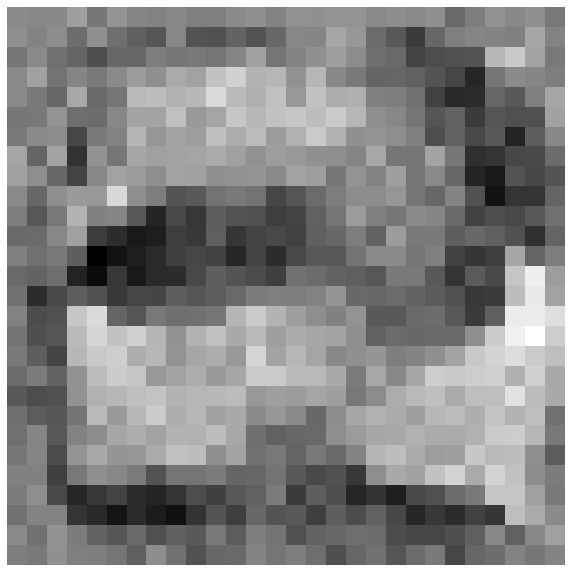

In [ ]:
plot(W[:,2].reshape(28,28))

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
(W.T).shape

torch.Size([10, 784])

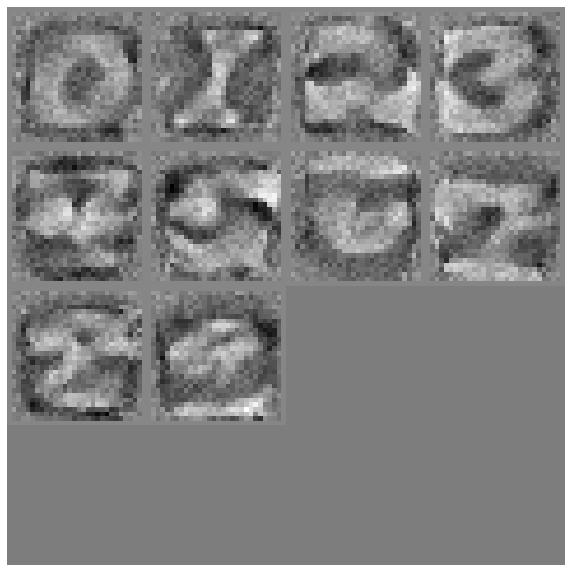

In [ ]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [ ]:
###################################################

In [ ]:
%%html
<img src ='https://miro.medium.com/max/1906/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg'>

In [ ]:
%%html
<img src = 'https://miro.medium.com/max/3648/1*wz59MnXkXdWxrq_fkA2wew.png'>

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
%%html
<img src ='https://i.stack.imgur.com/fXqXs.png'>

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


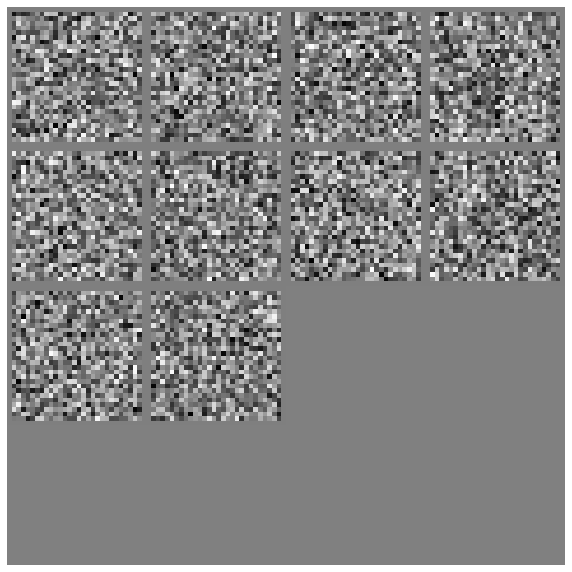

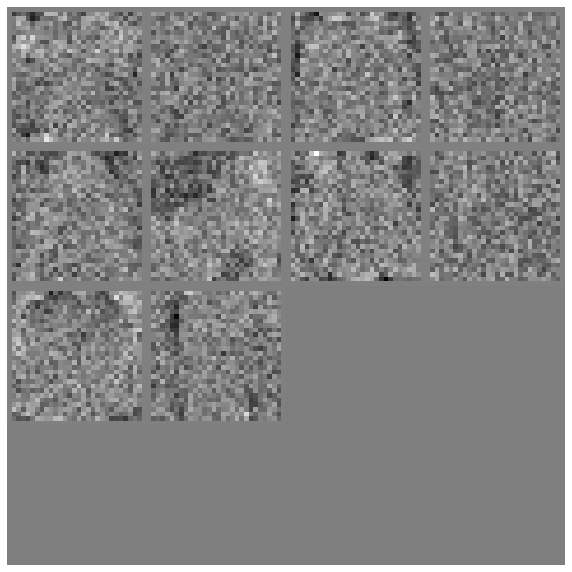

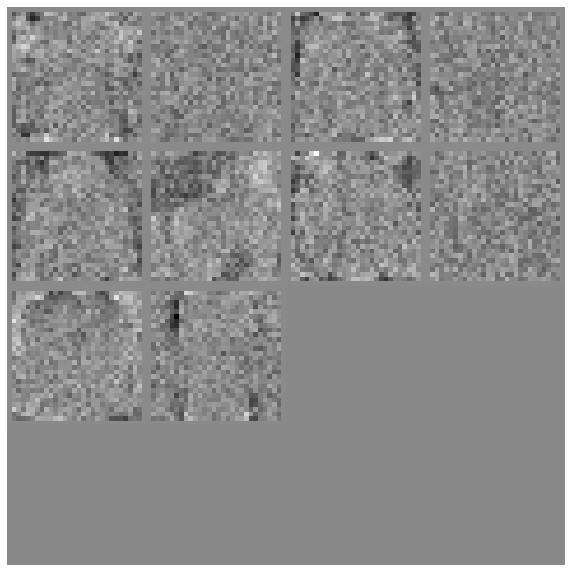

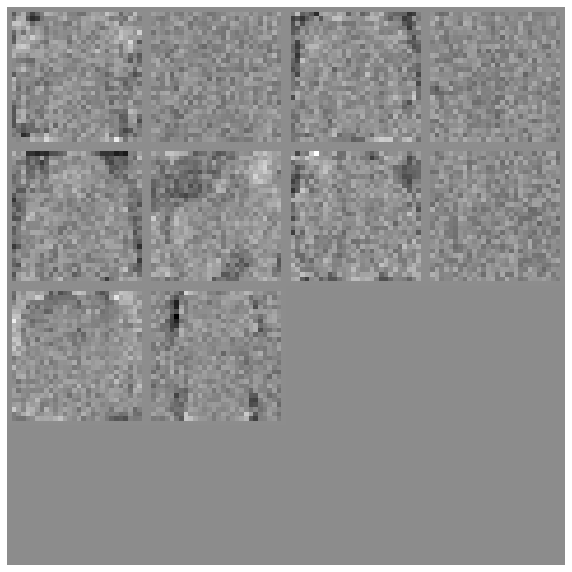

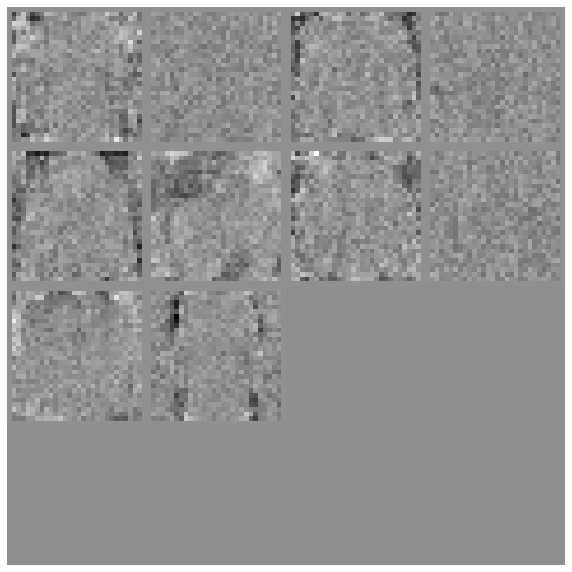

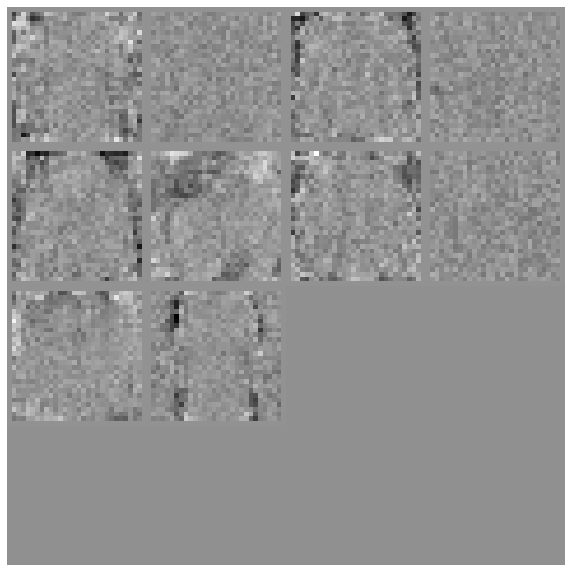

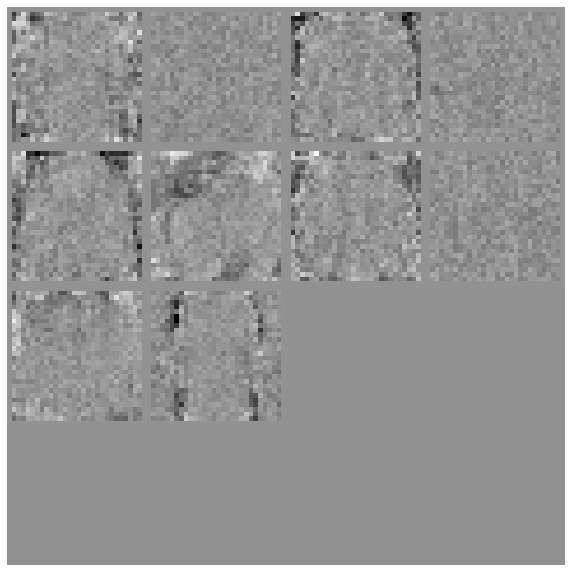

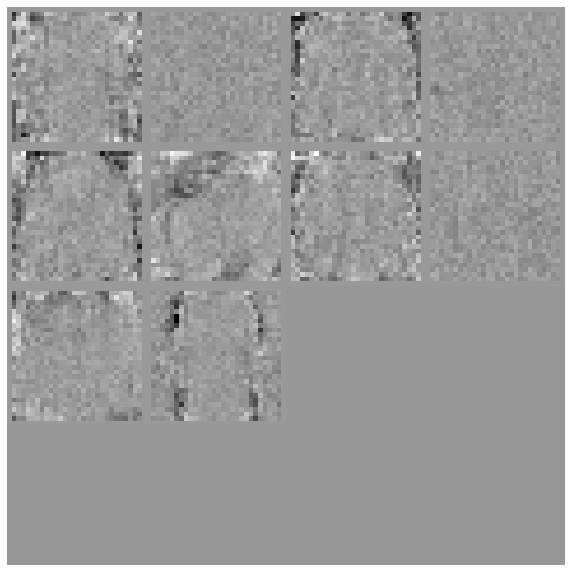

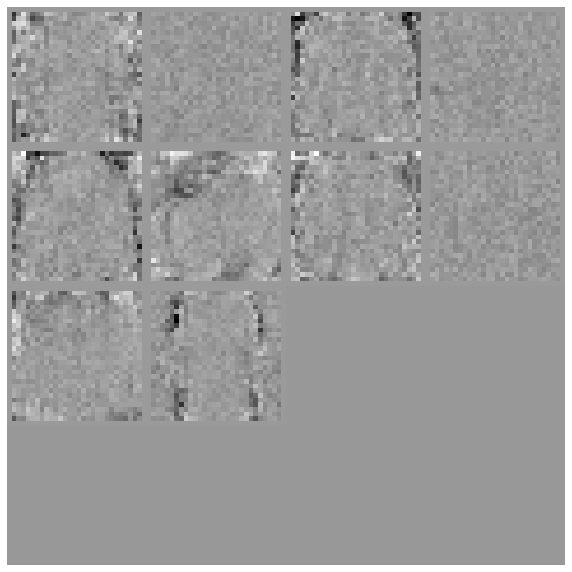

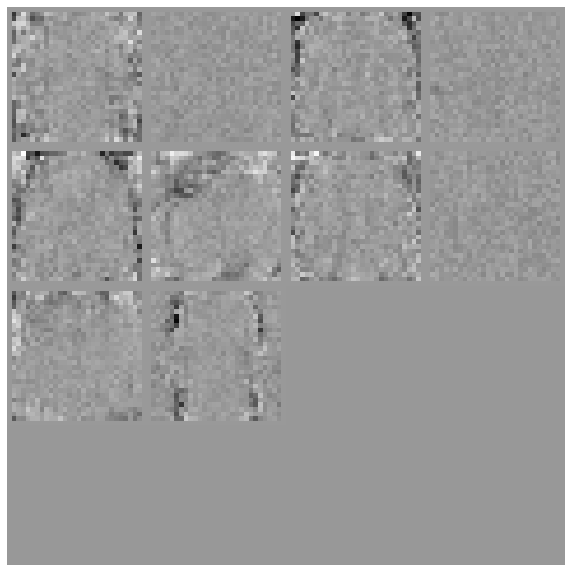

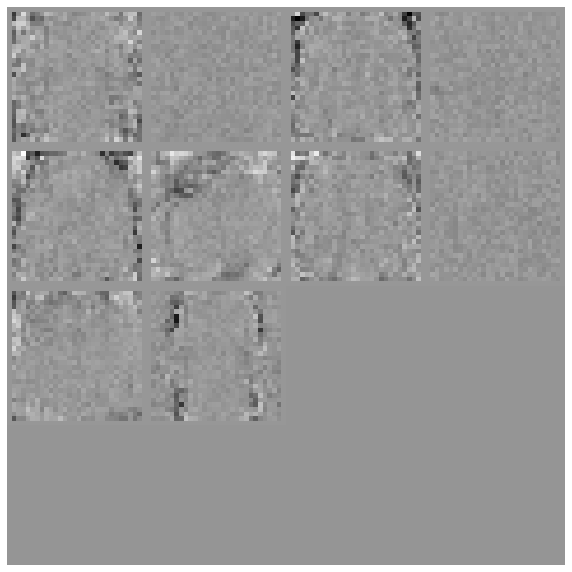

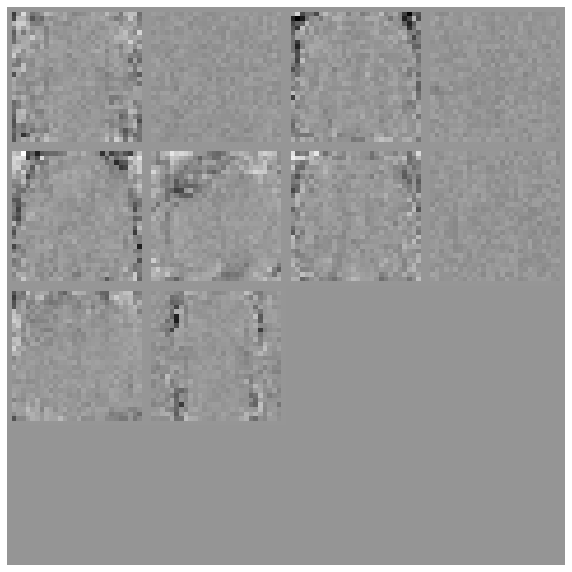

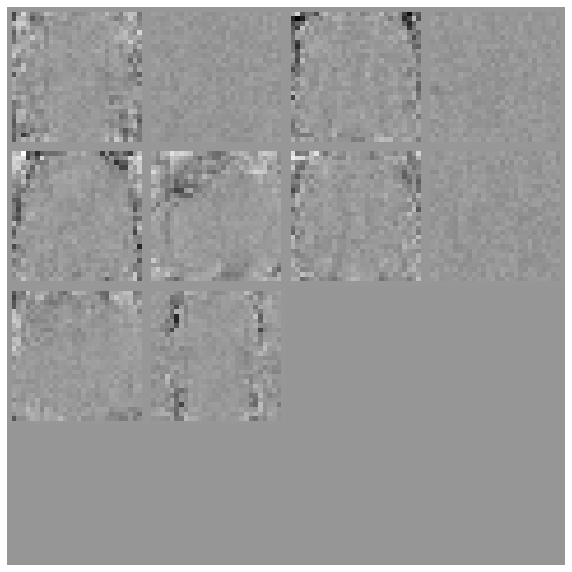

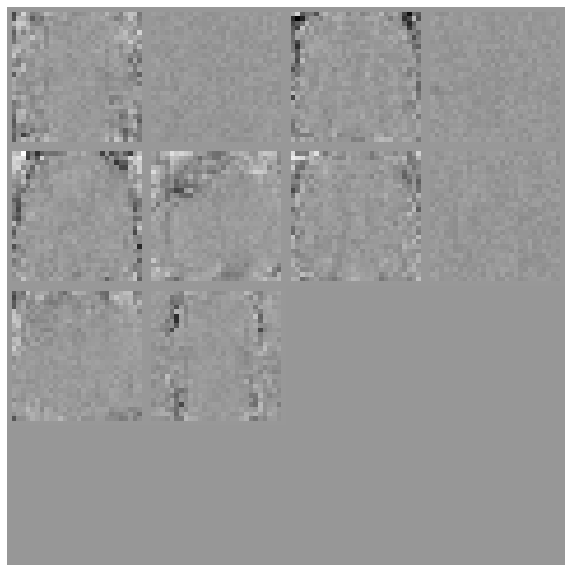

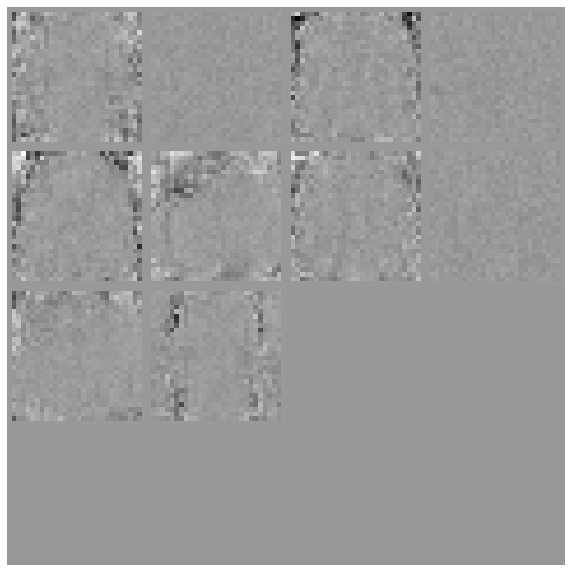

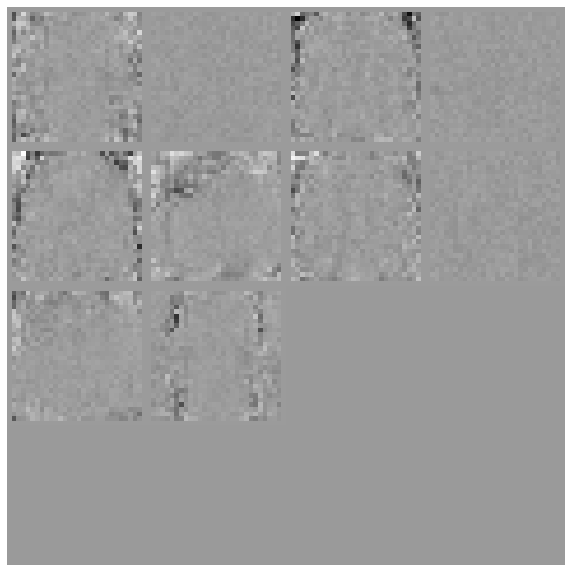

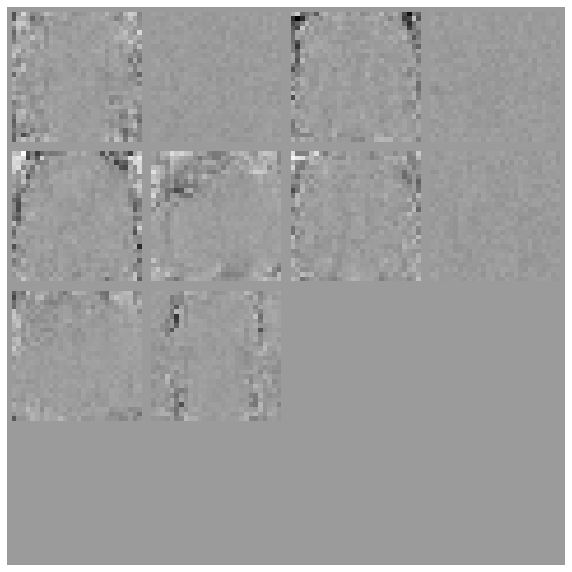

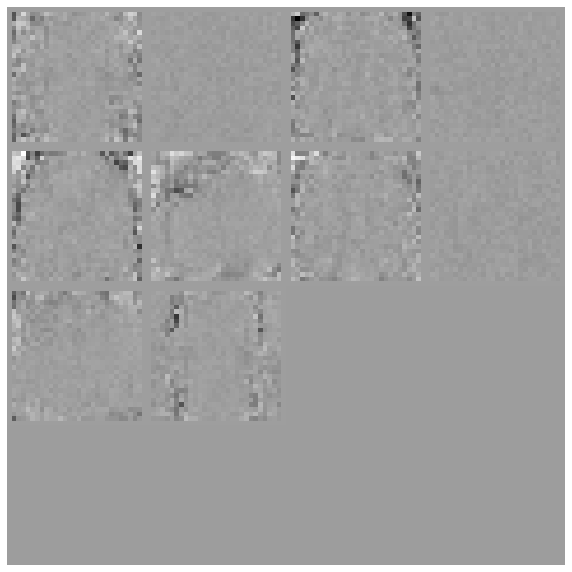

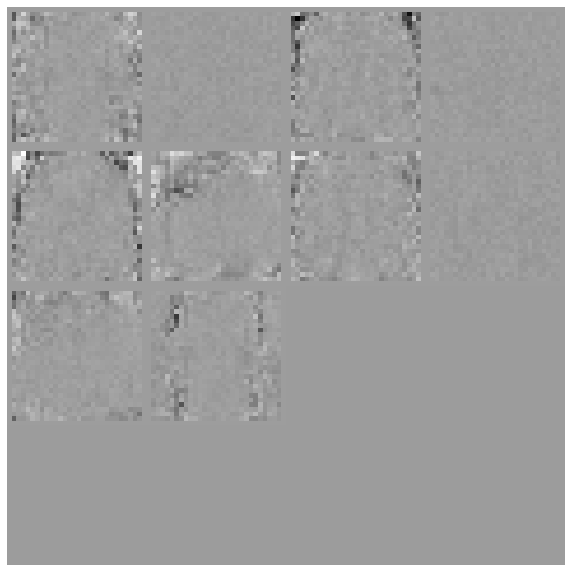

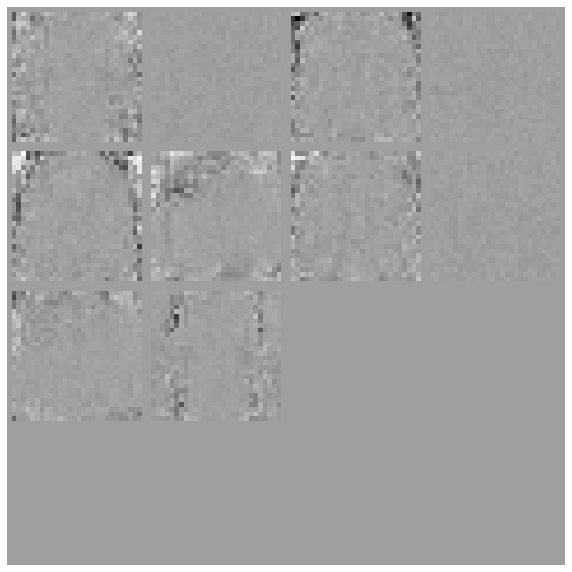

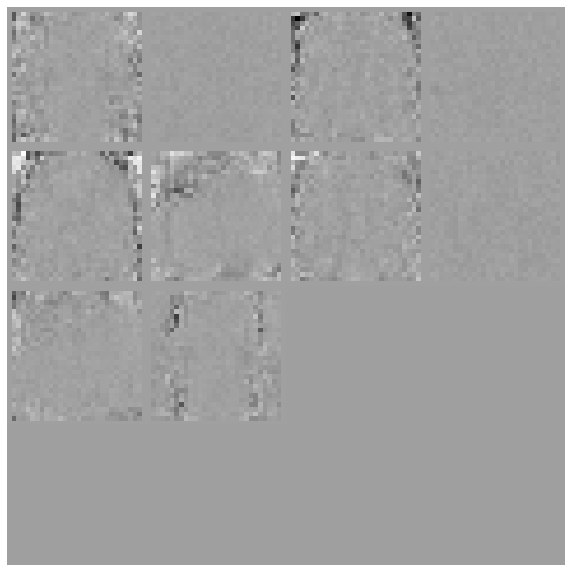

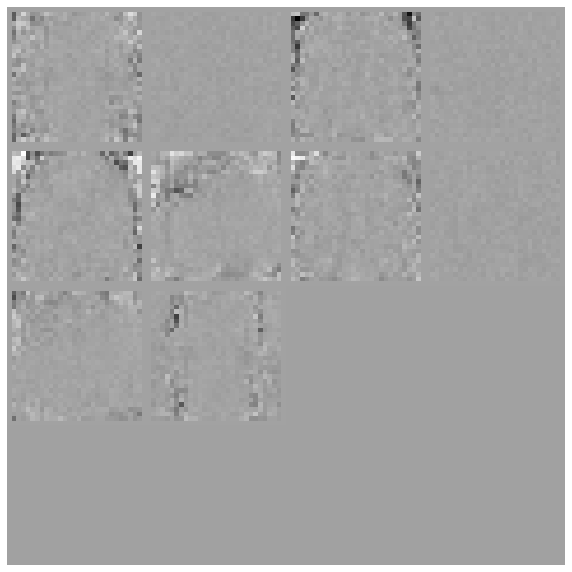

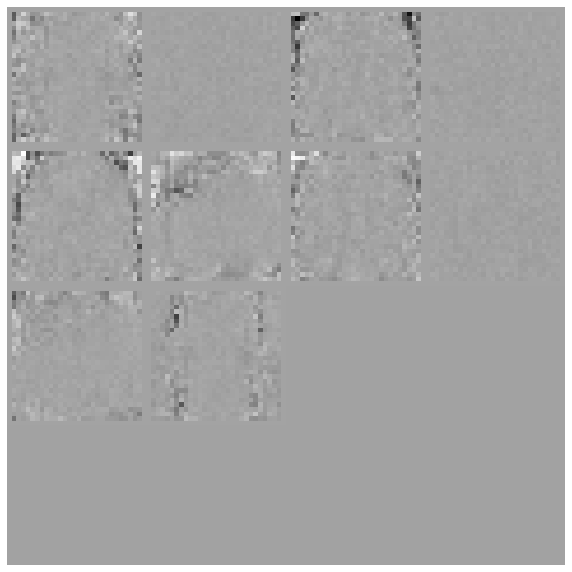

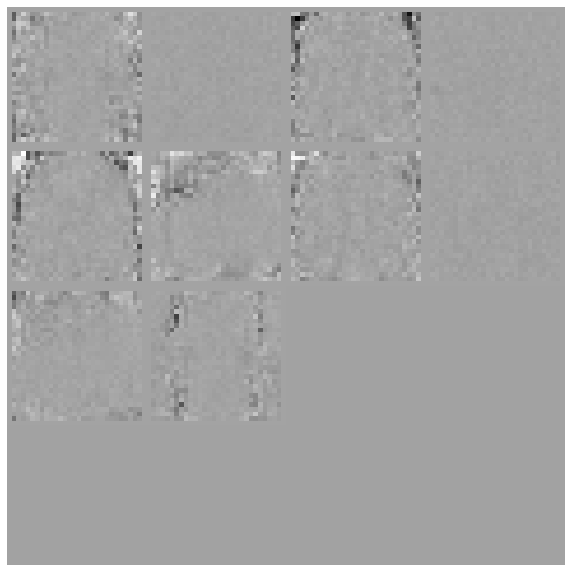

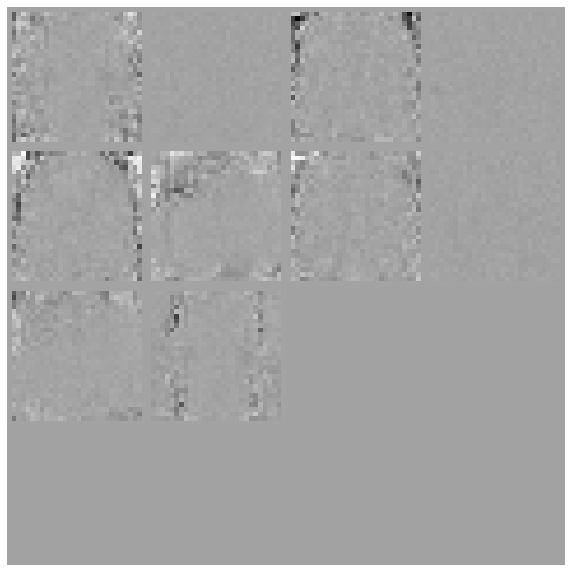

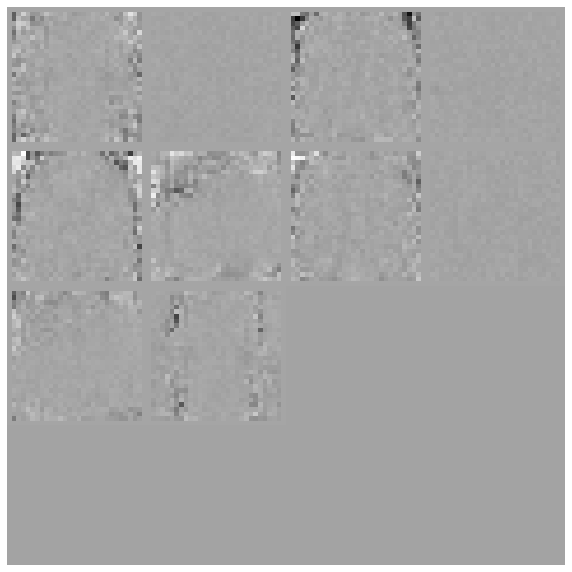

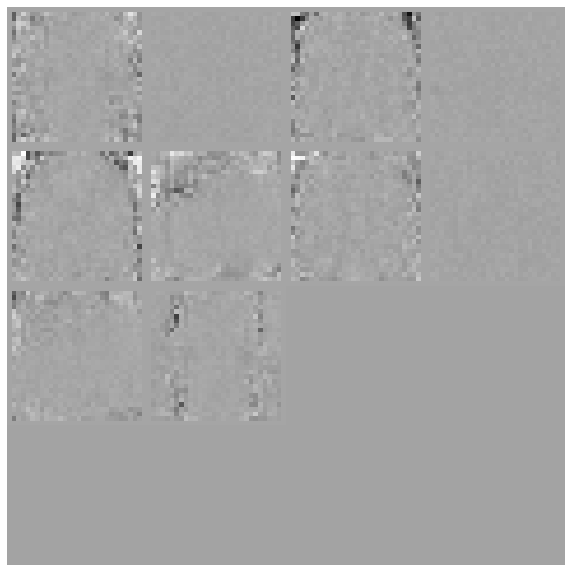

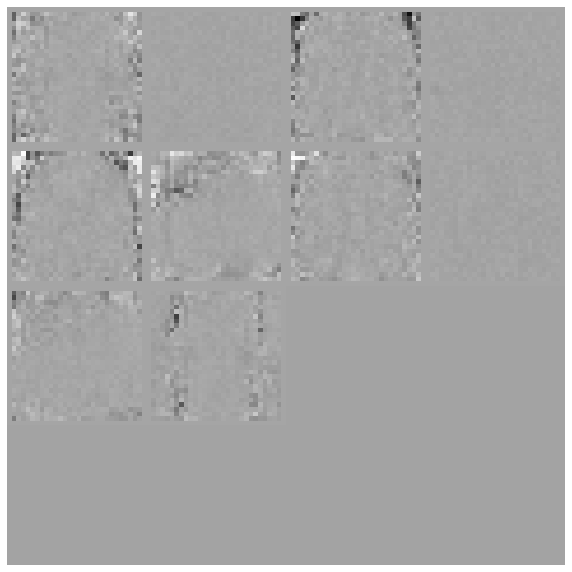

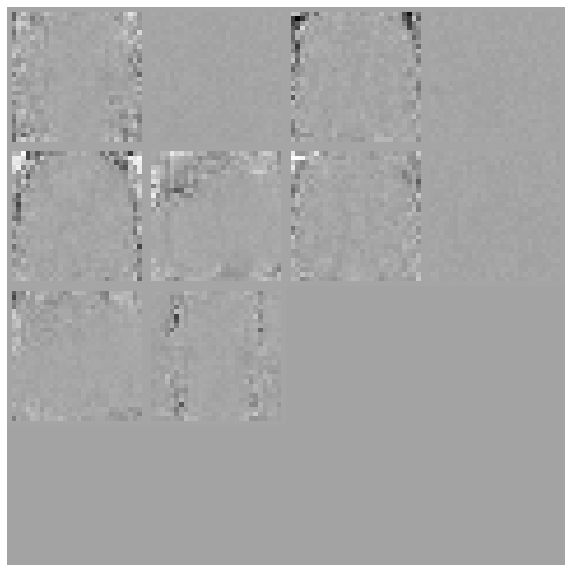

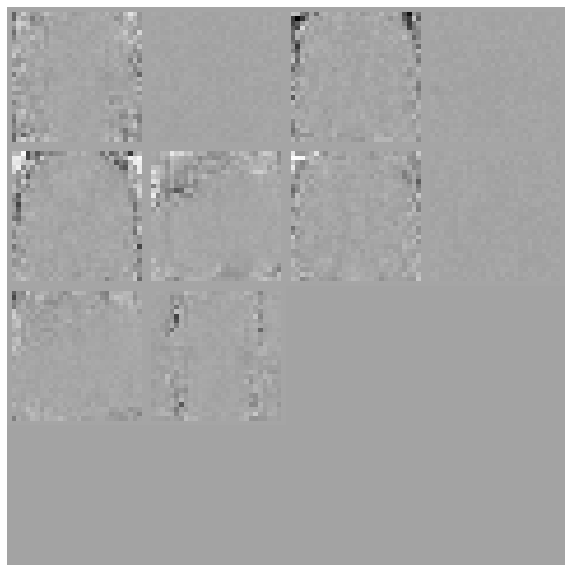

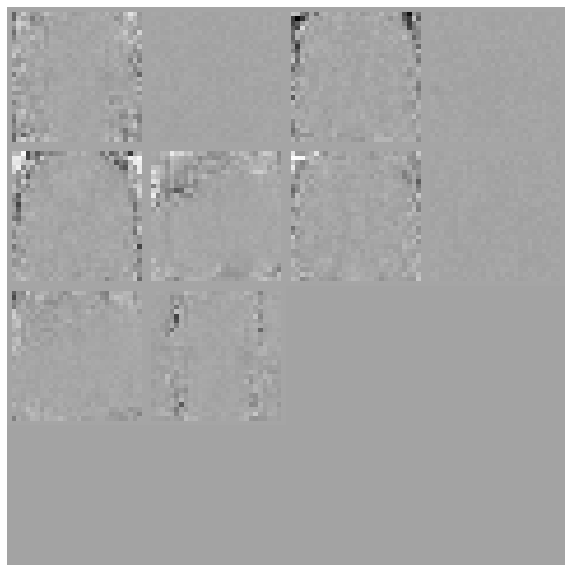

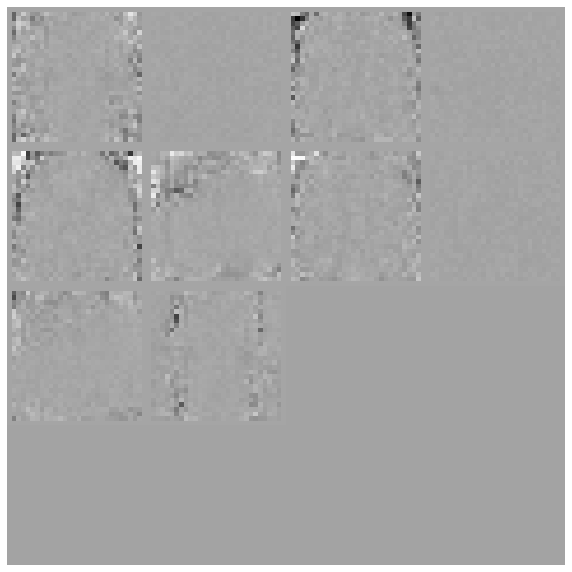

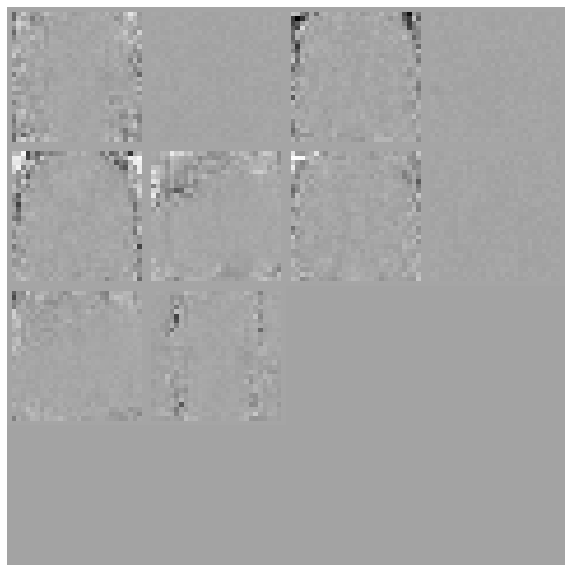

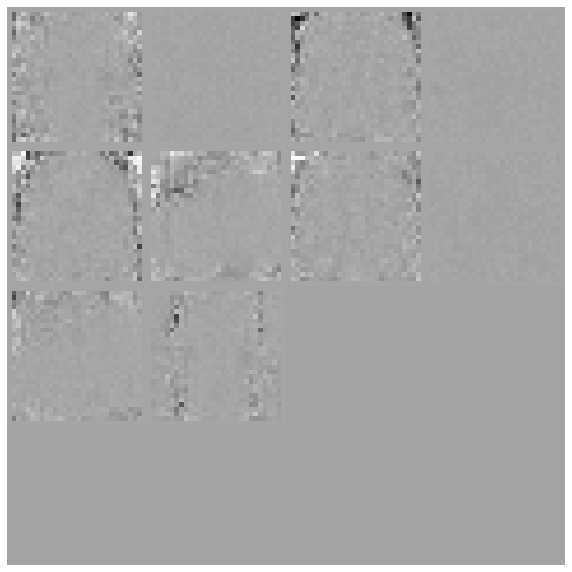

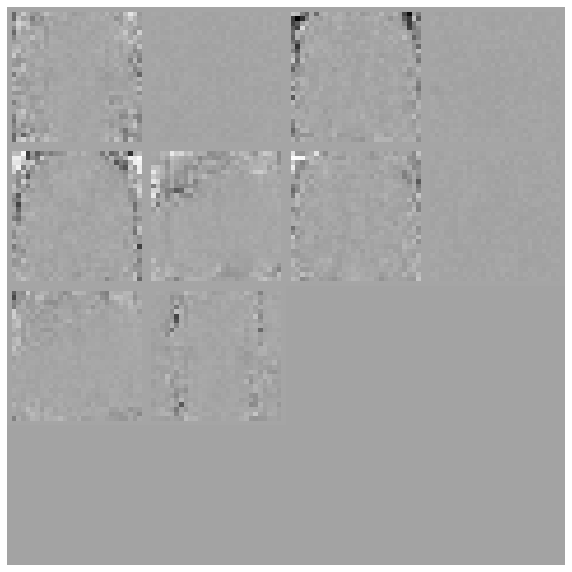

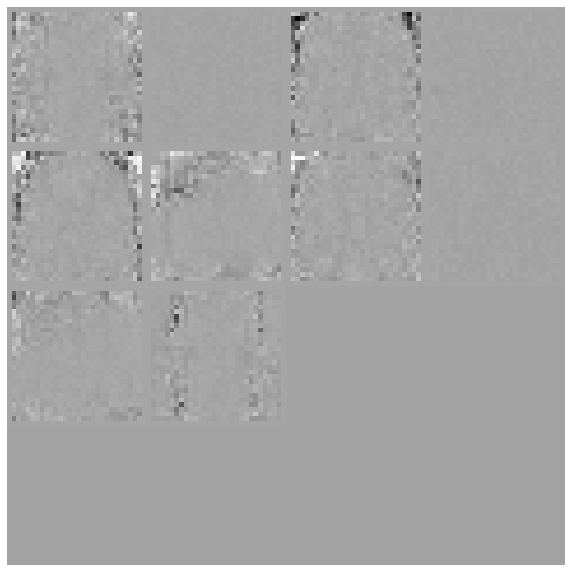

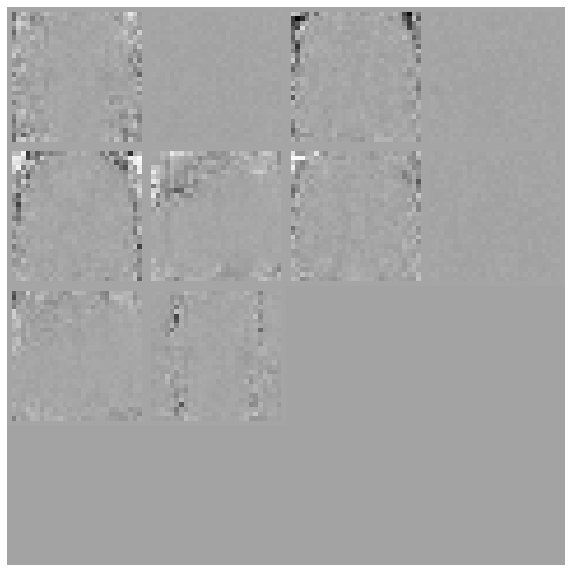

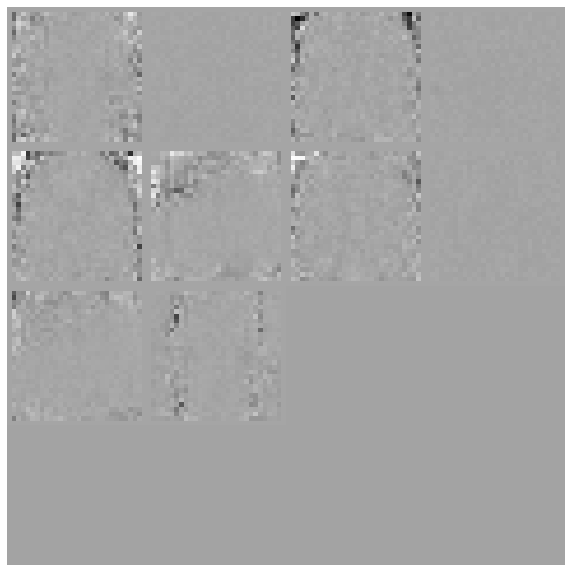

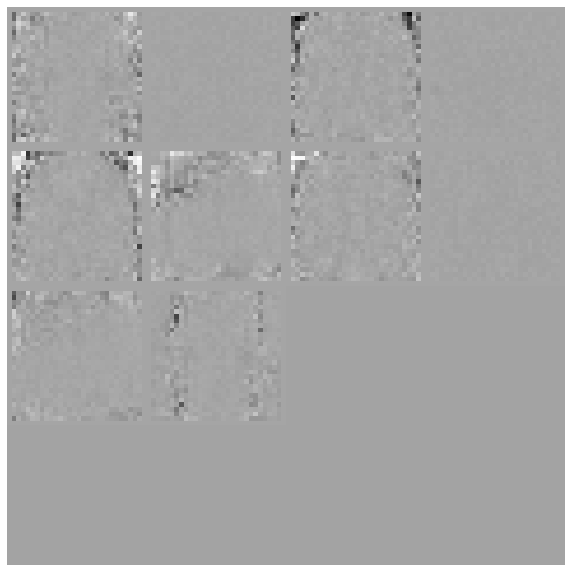

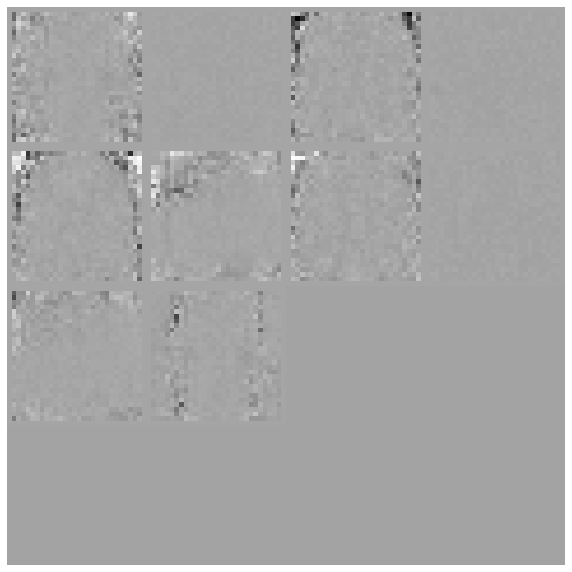

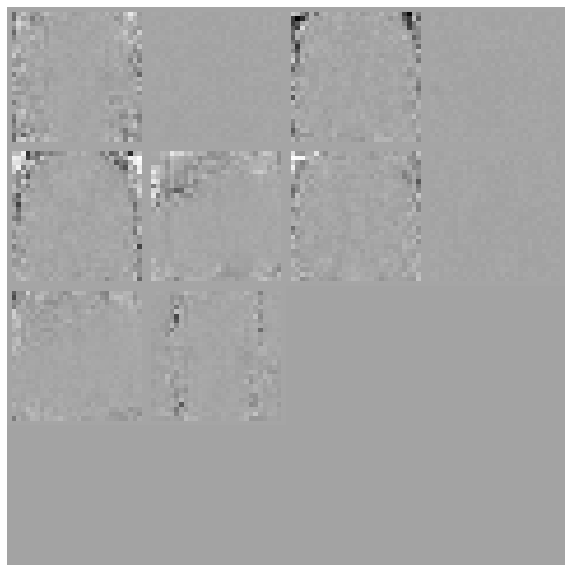

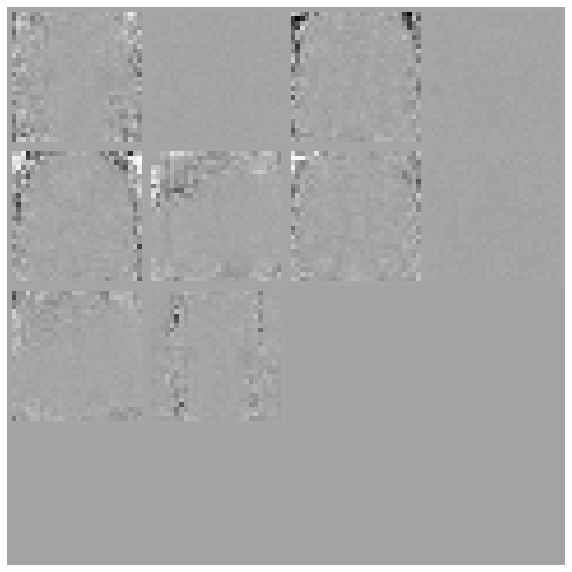

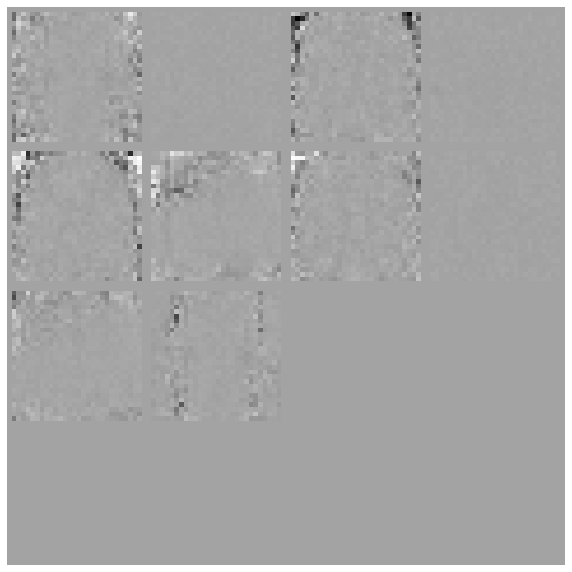

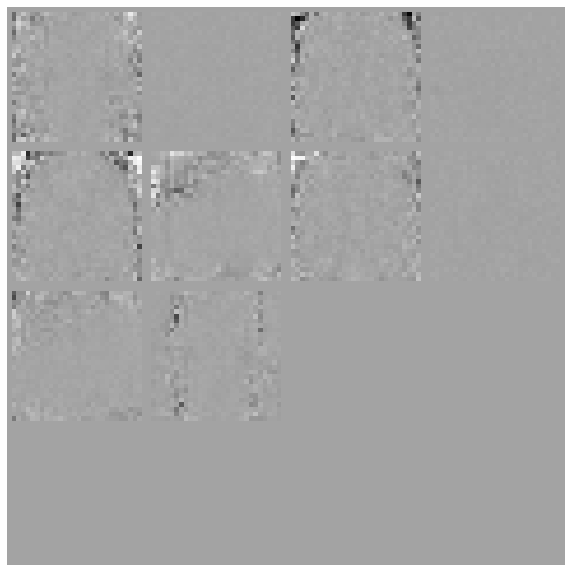

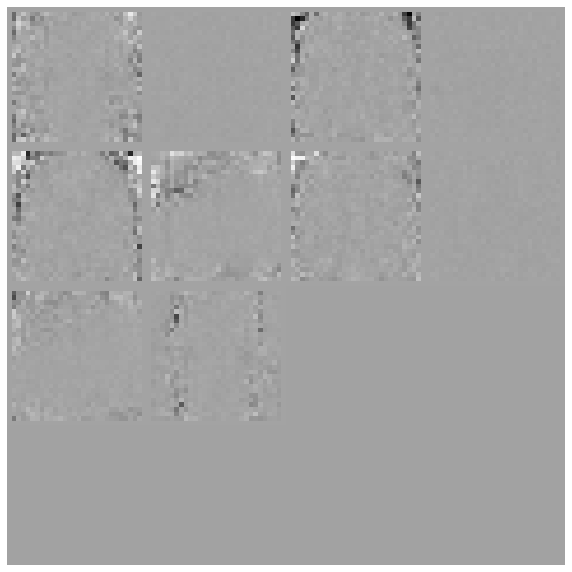

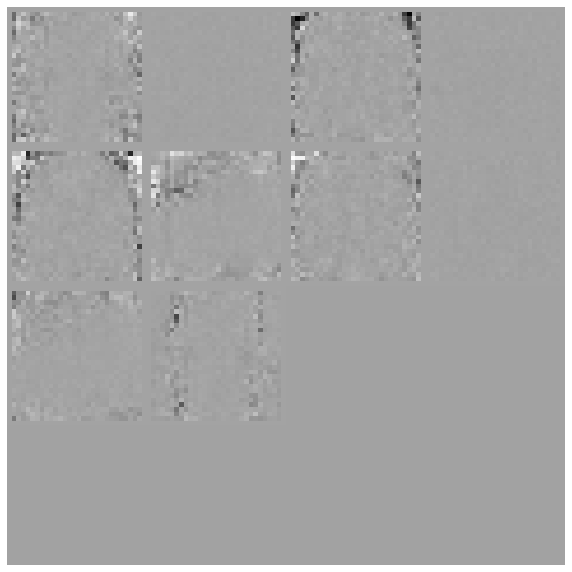

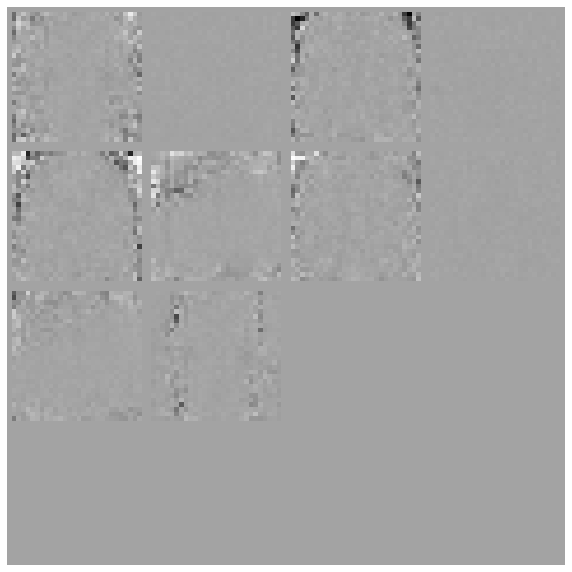

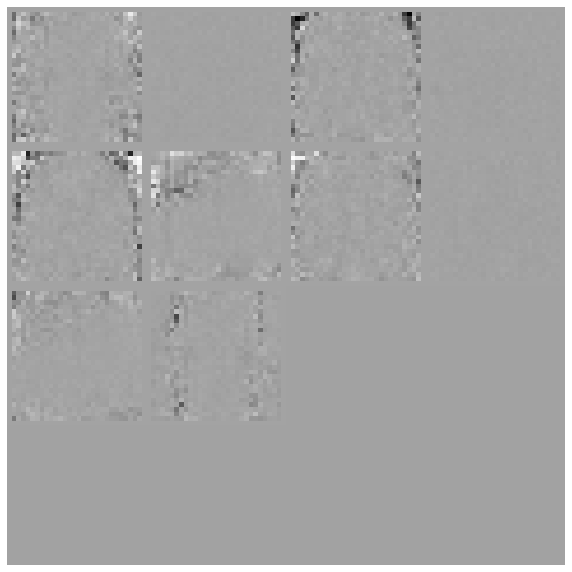

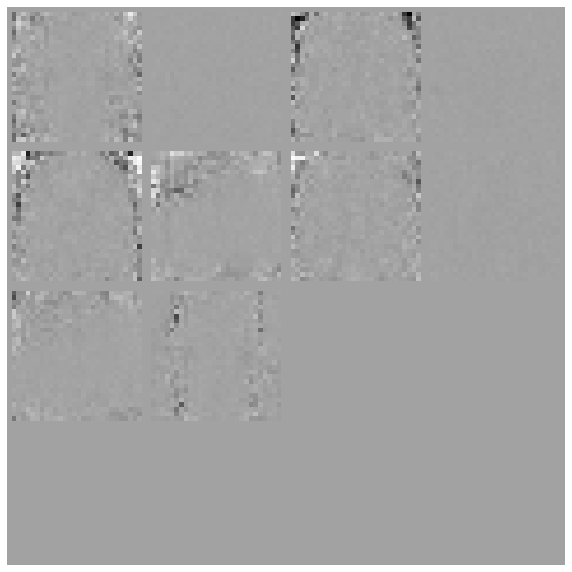

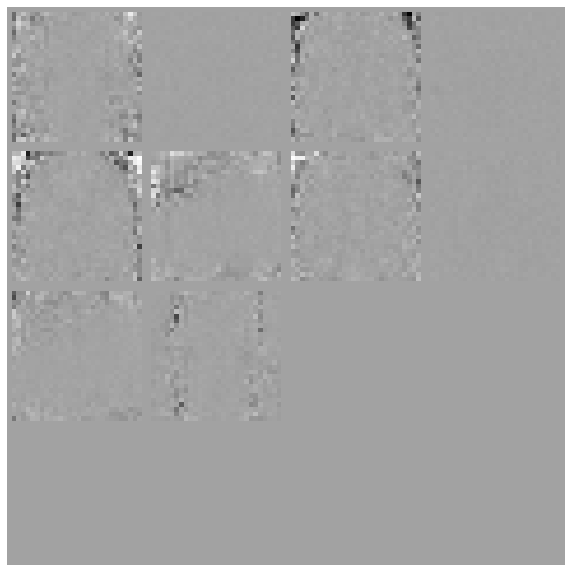

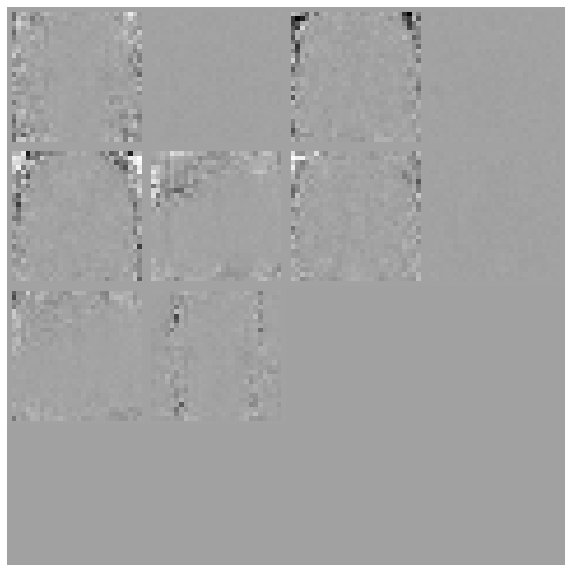

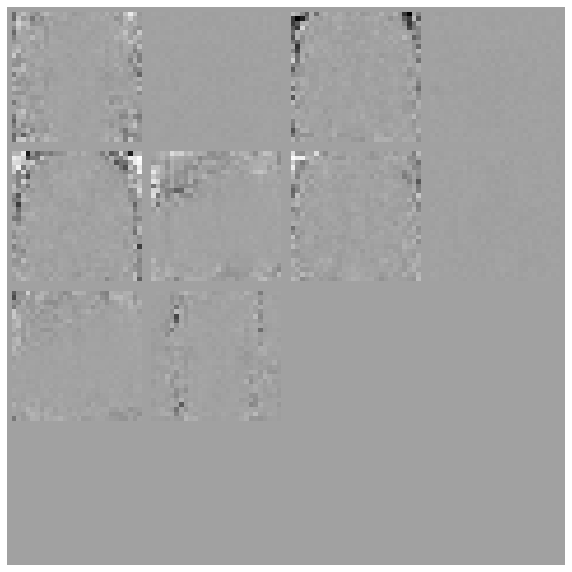

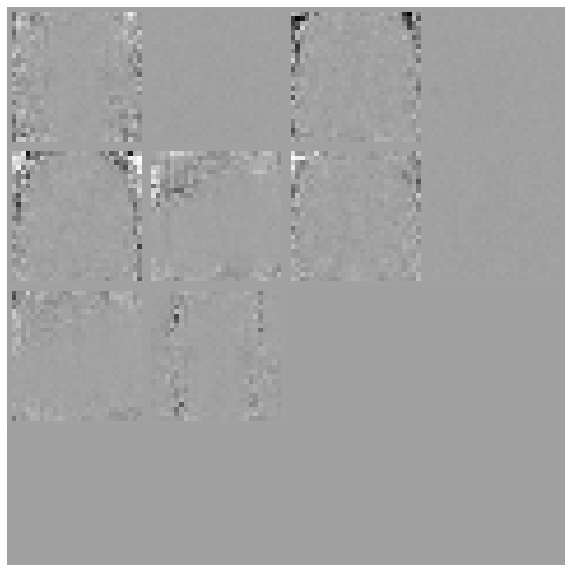

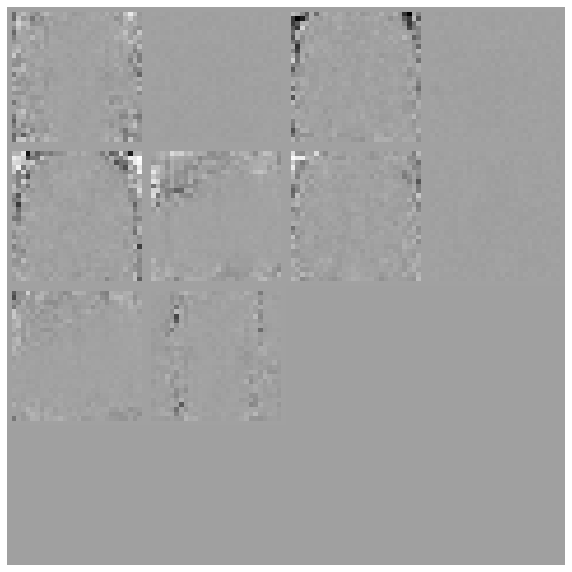

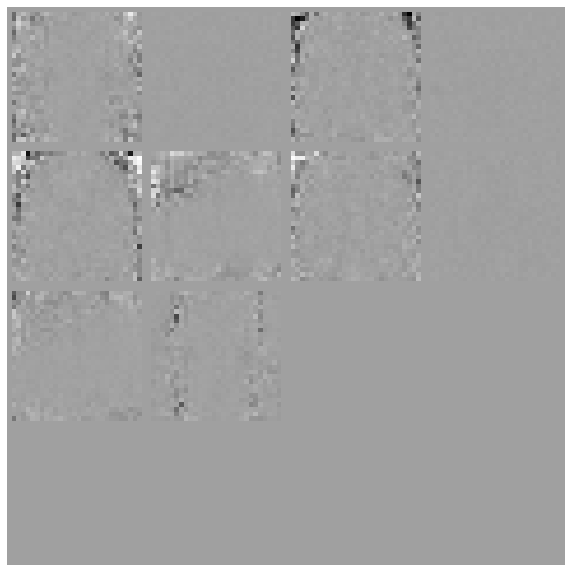

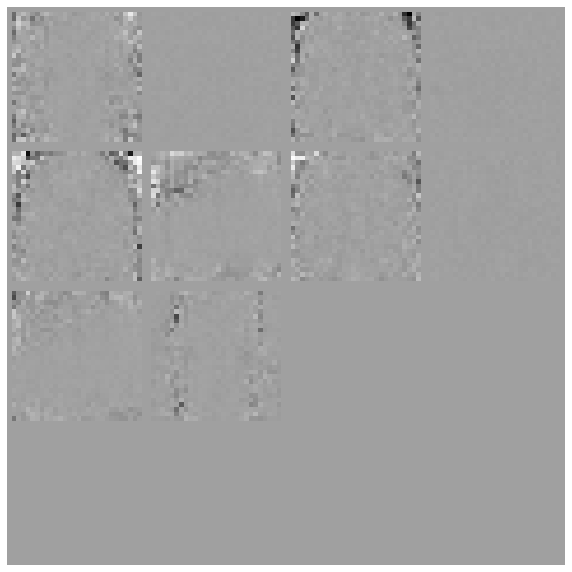

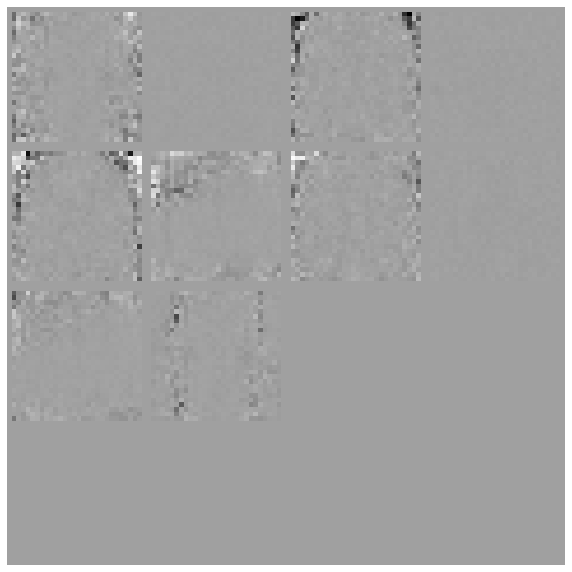

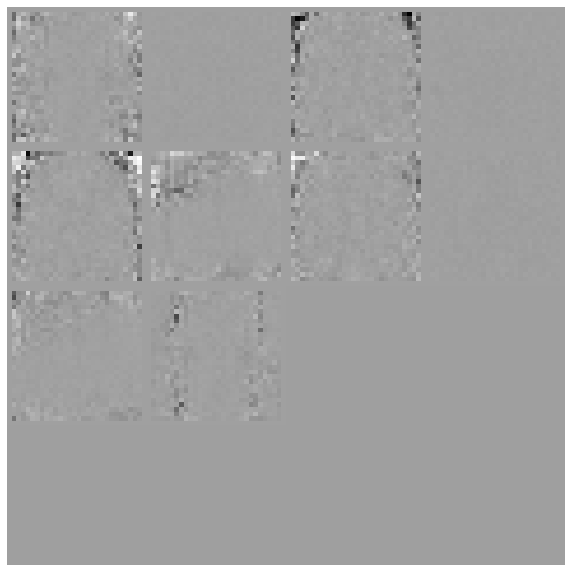

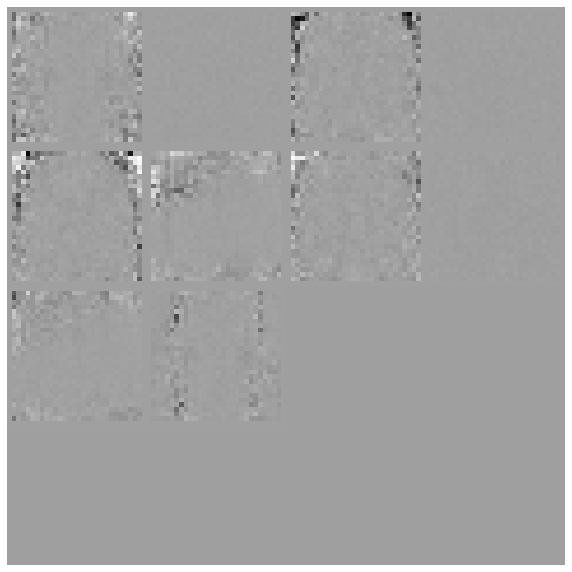

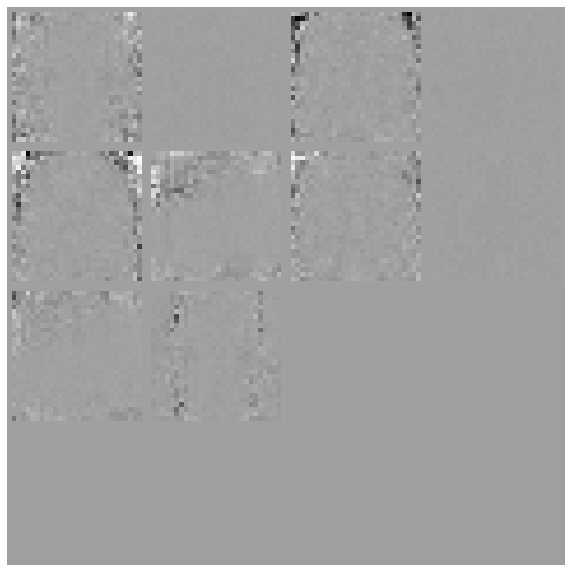

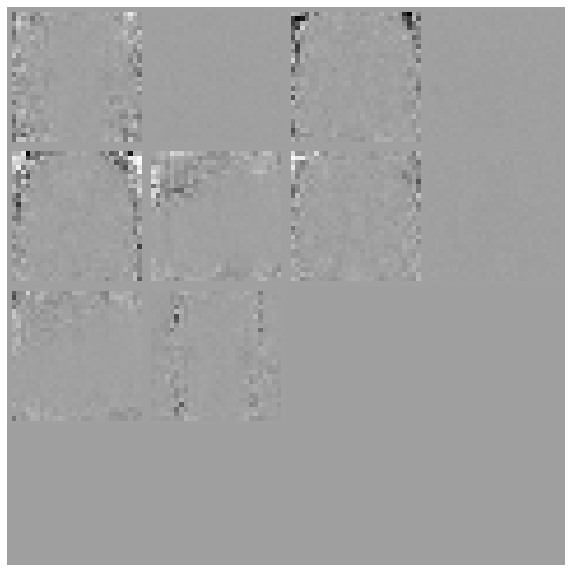

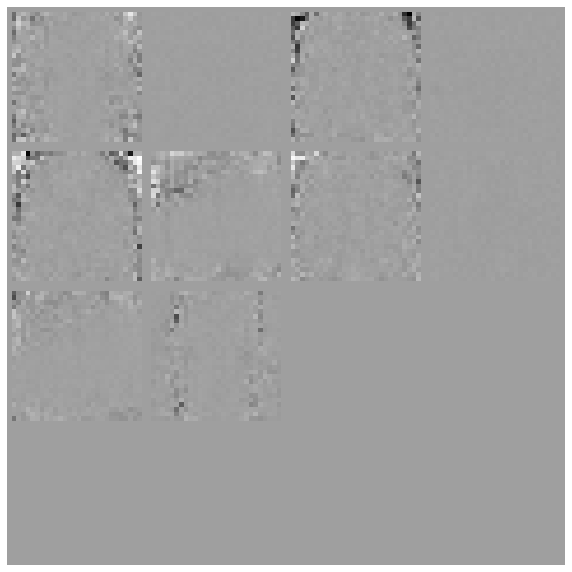

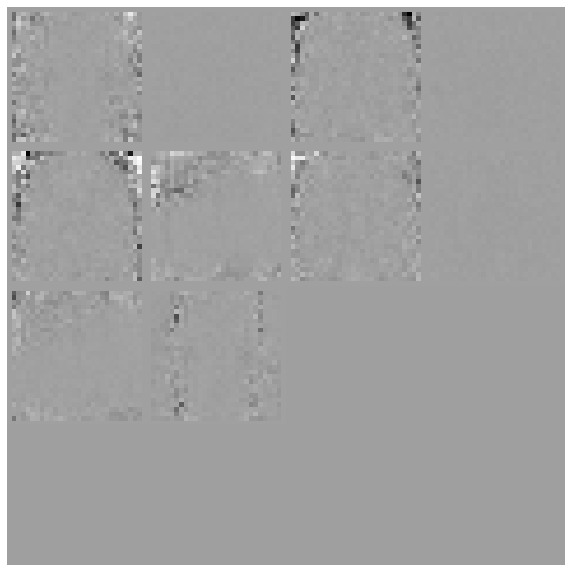

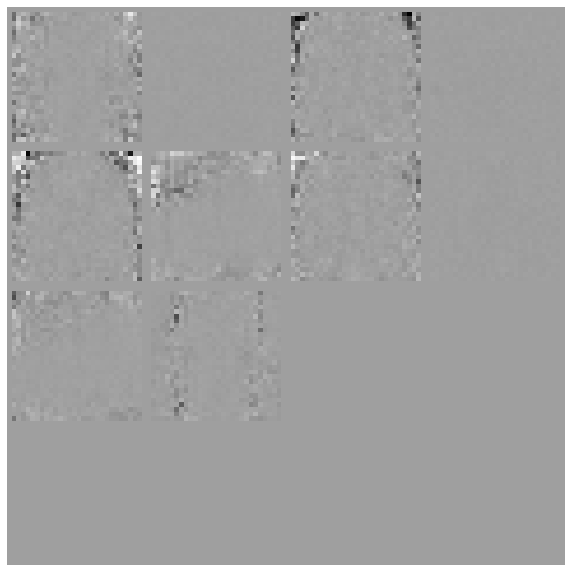

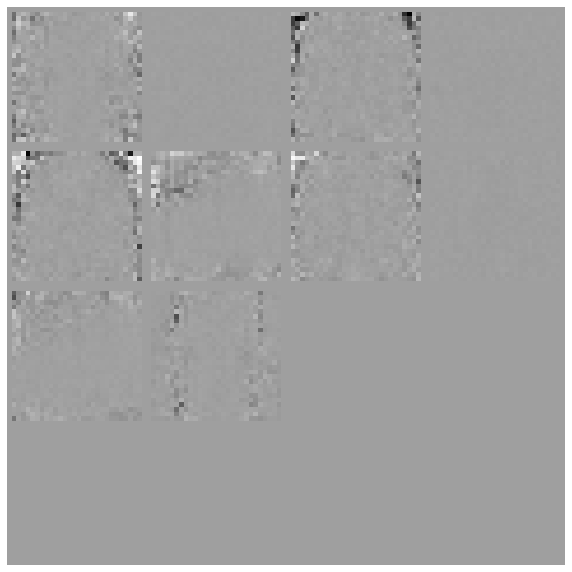

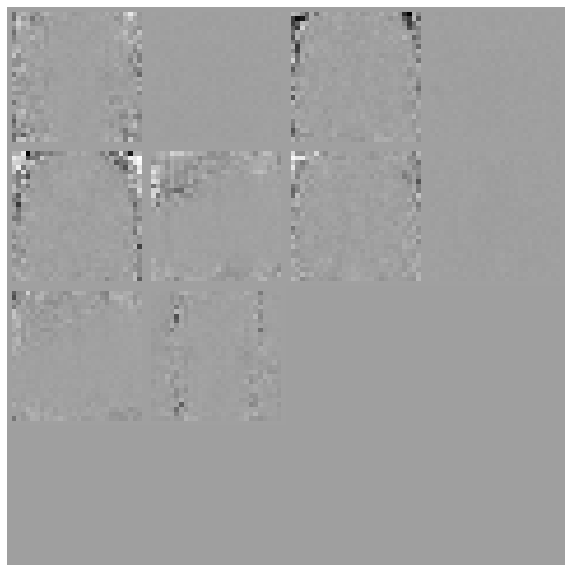

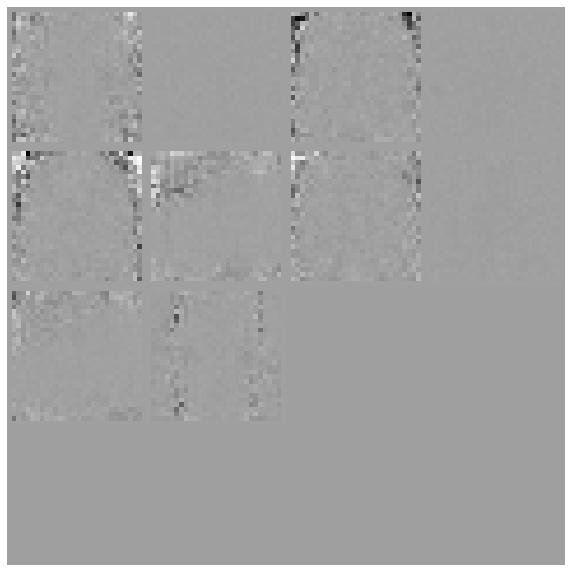

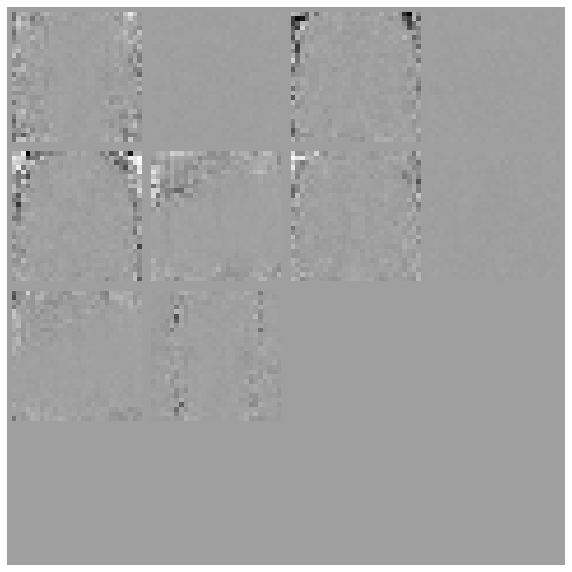

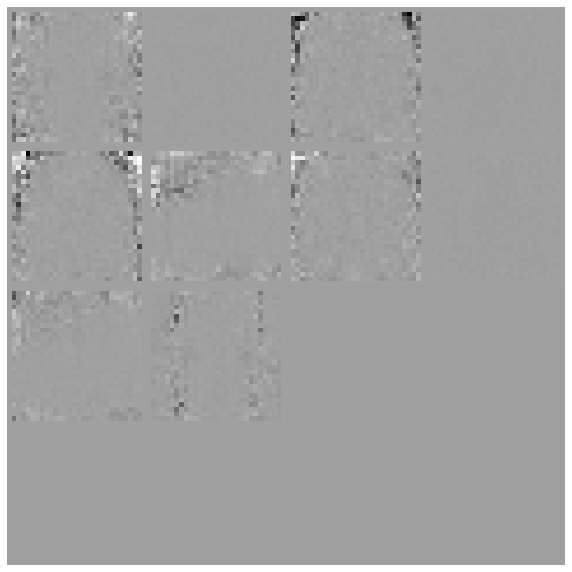

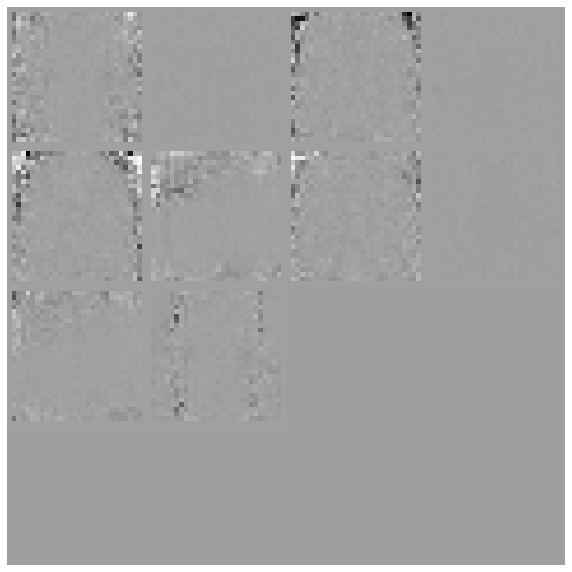

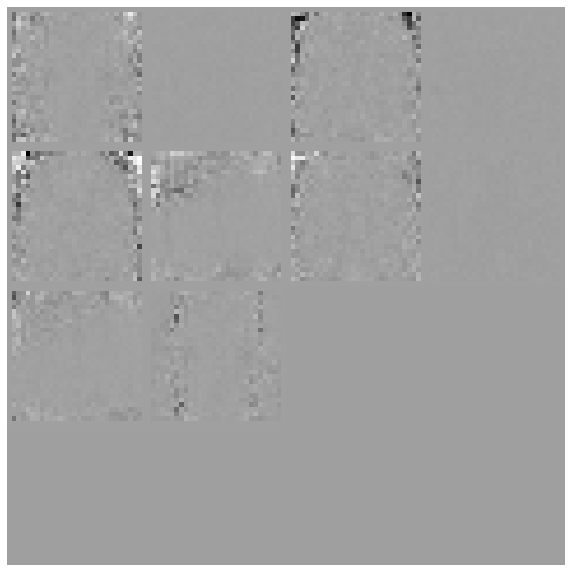

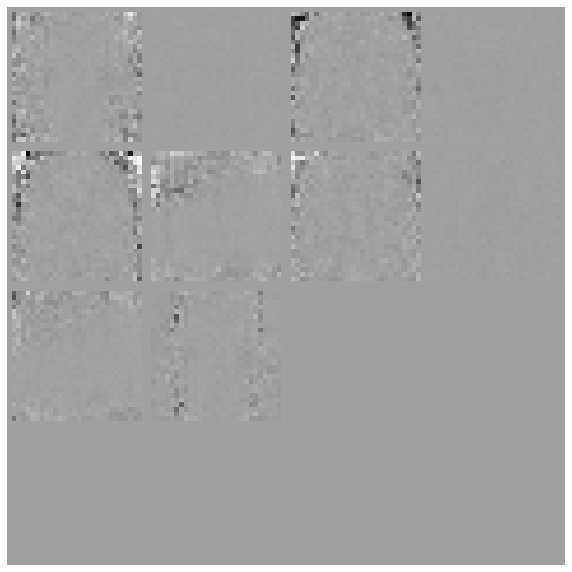

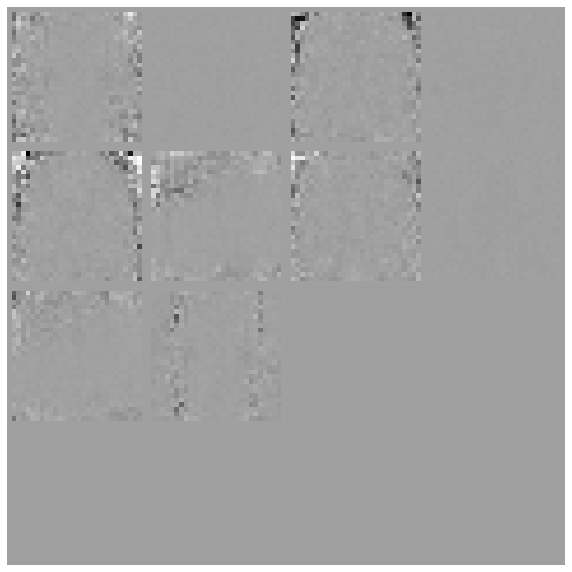

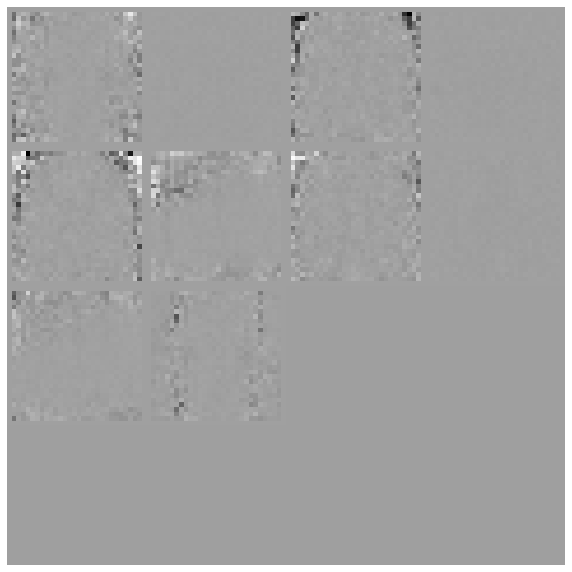

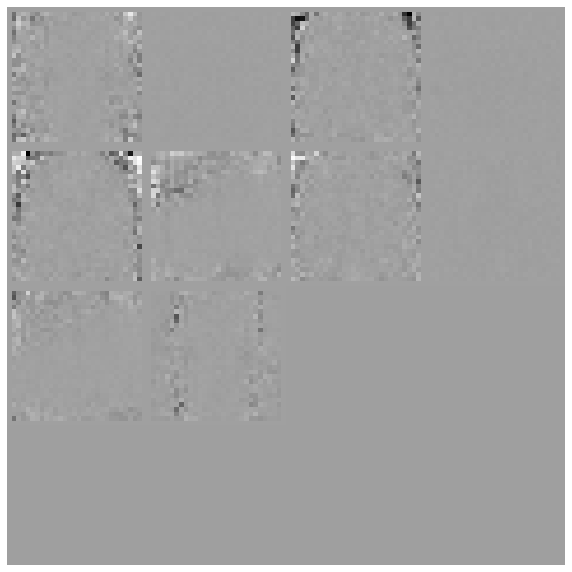

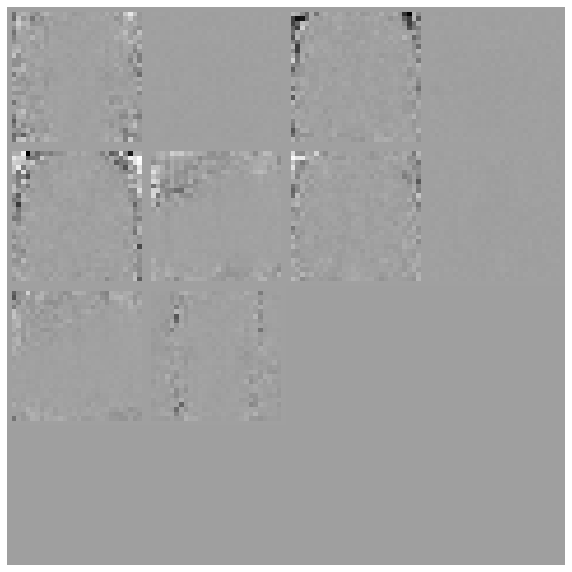

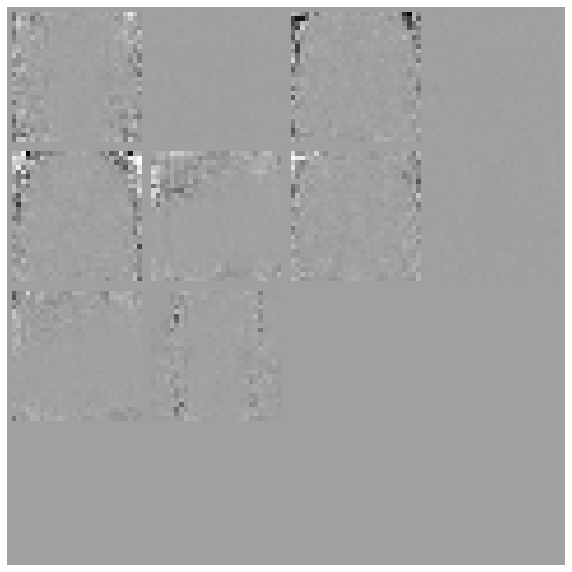

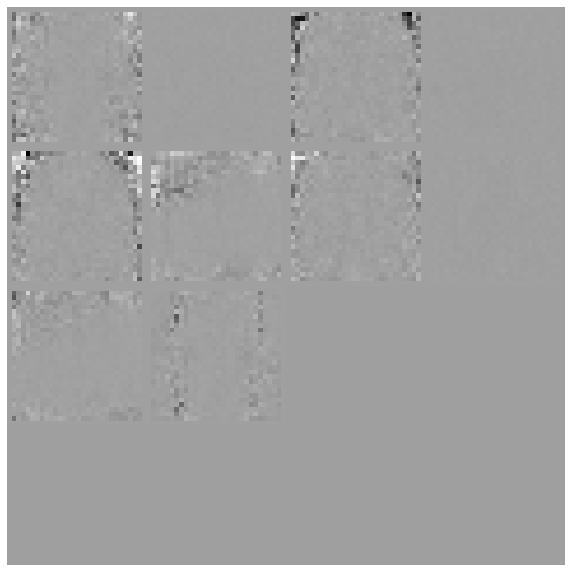

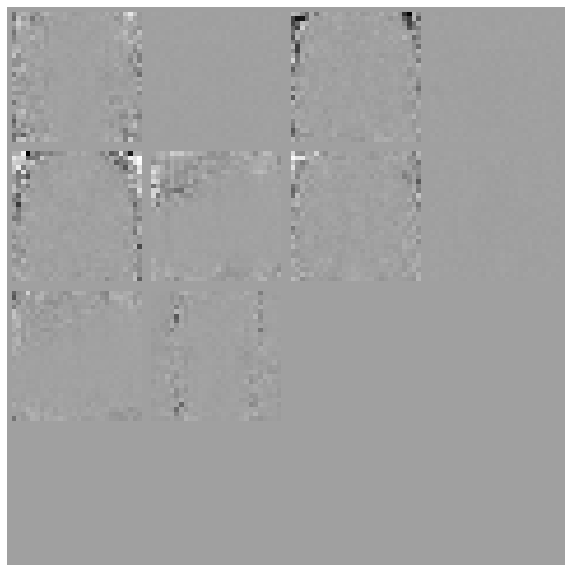

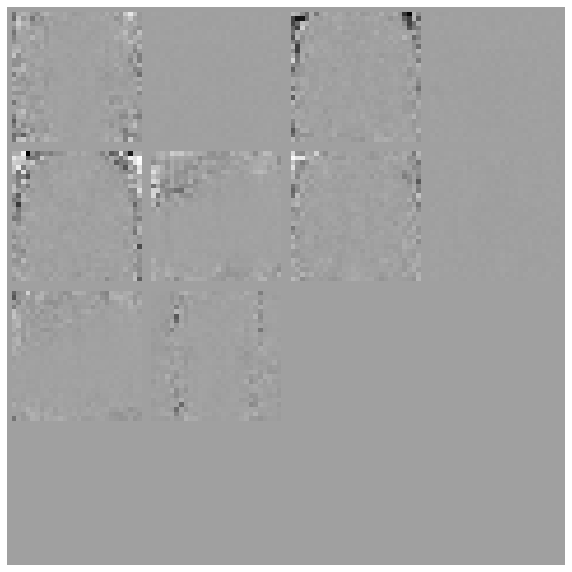

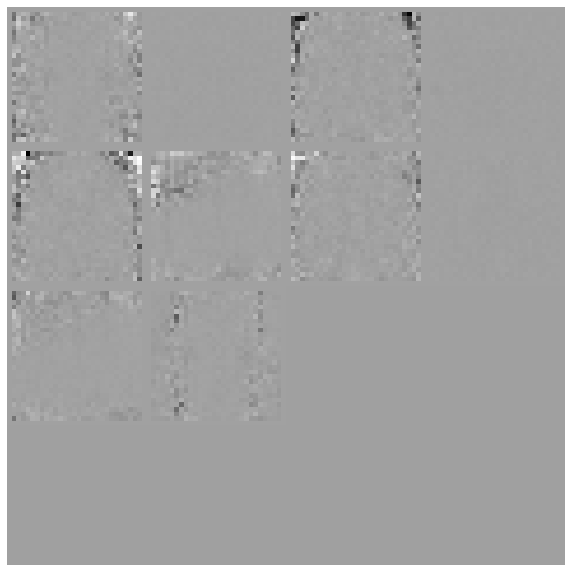

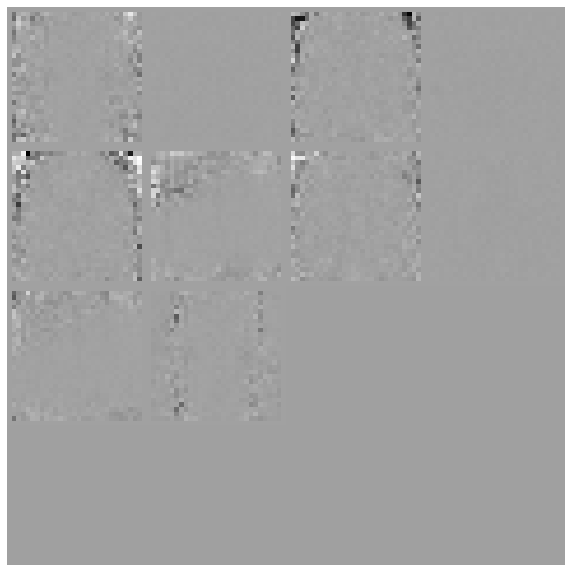

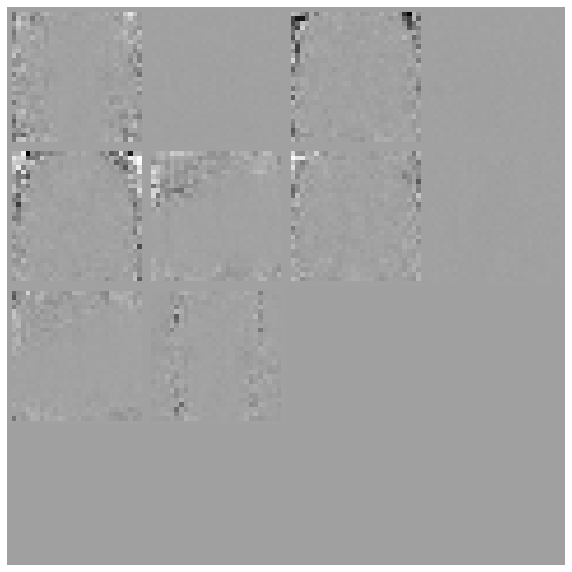

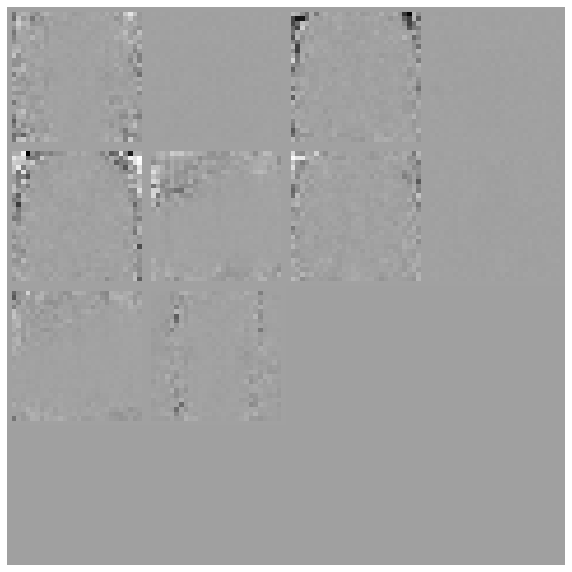

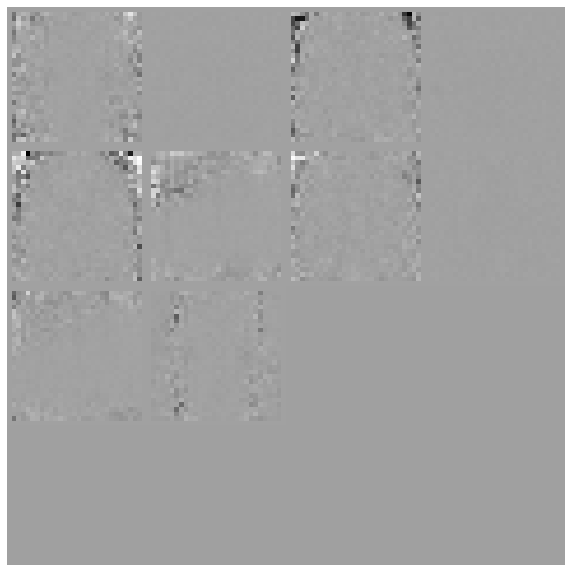

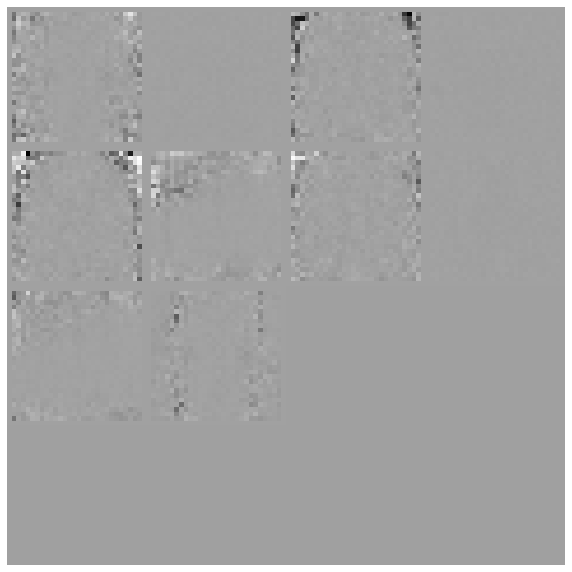

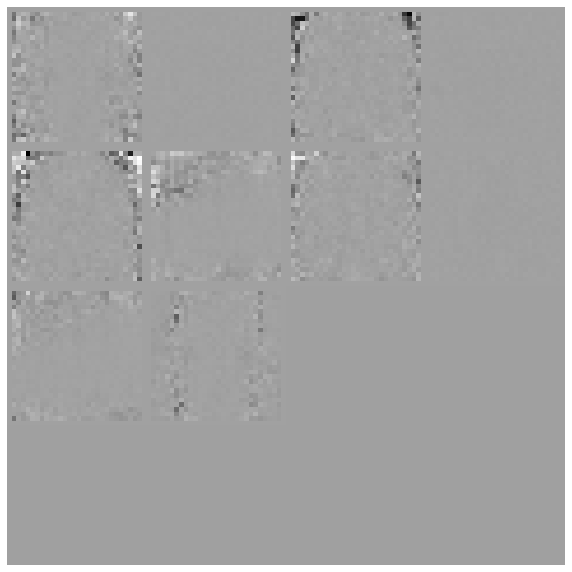

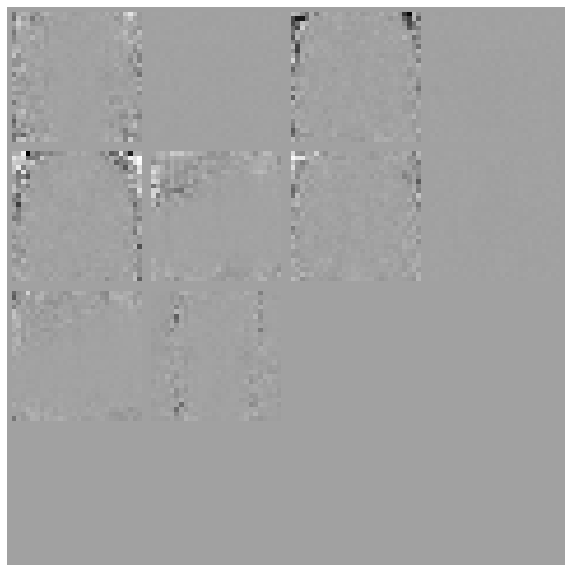

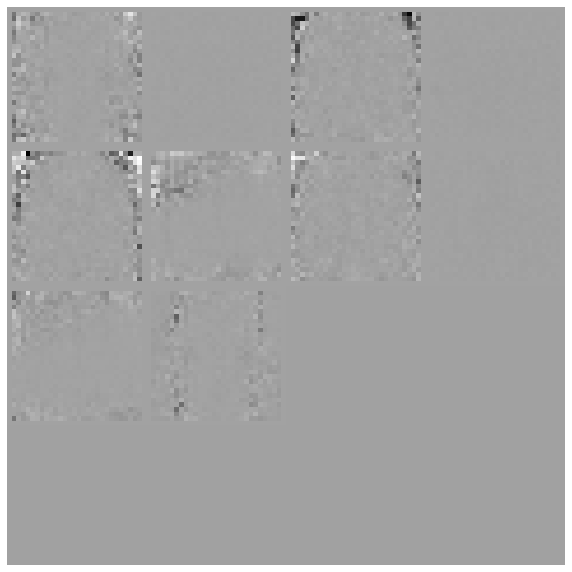

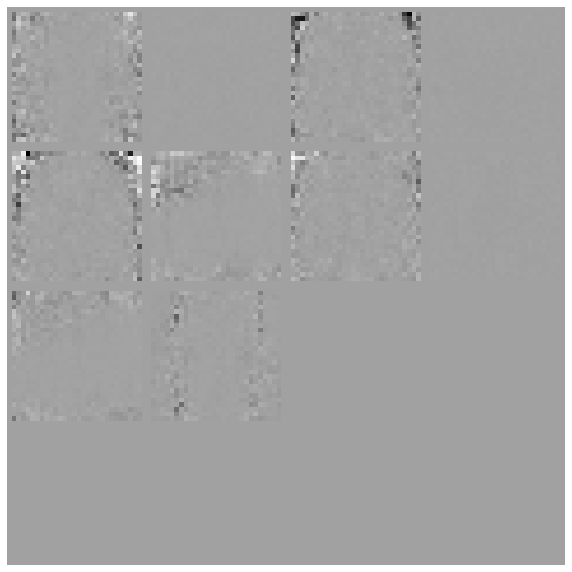

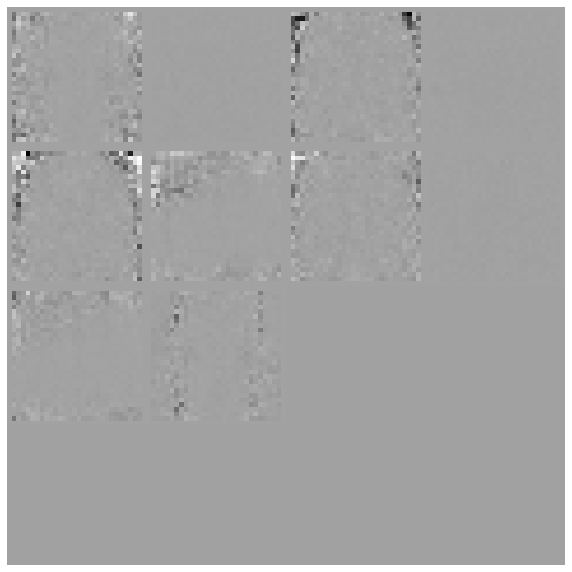

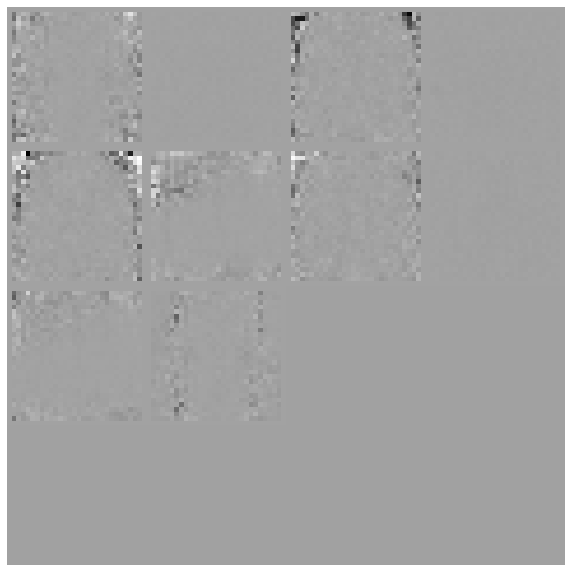

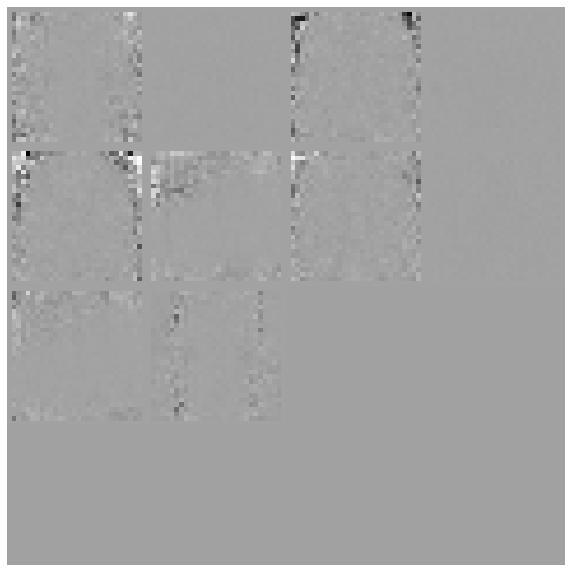

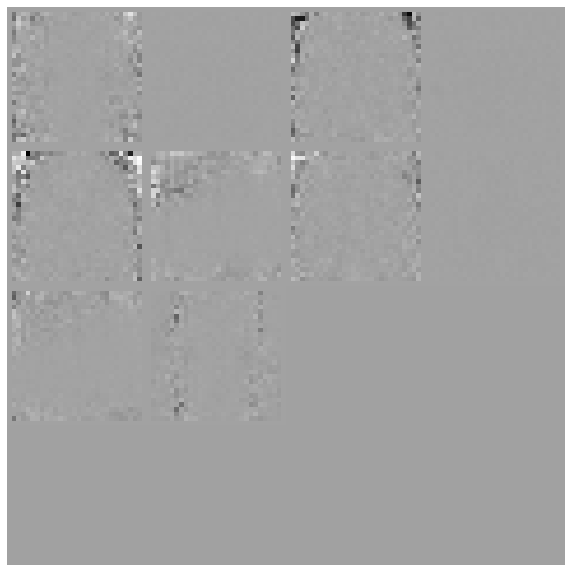

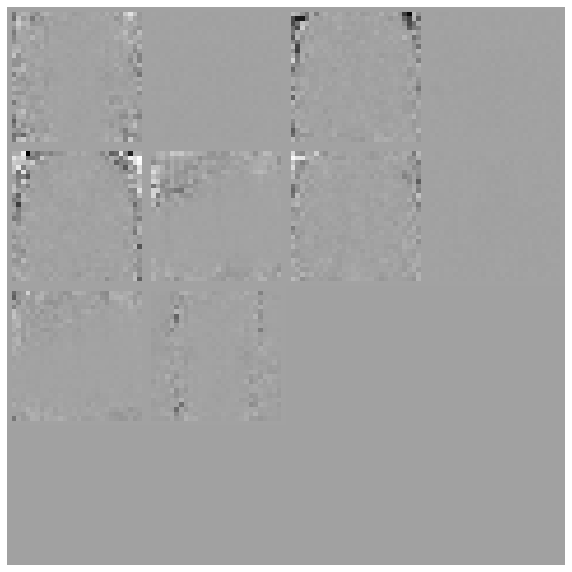

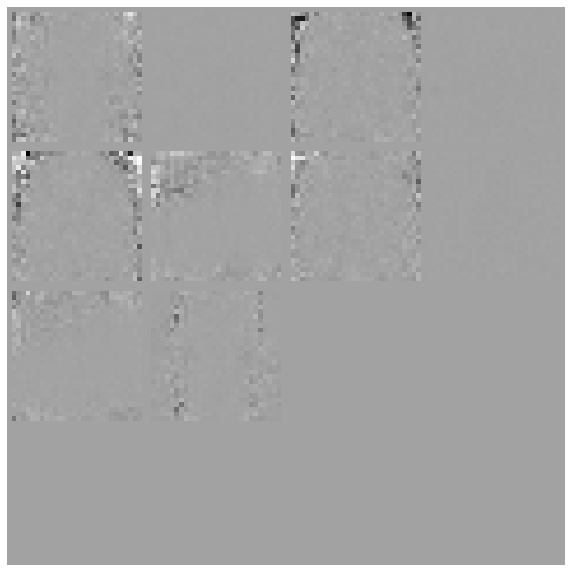

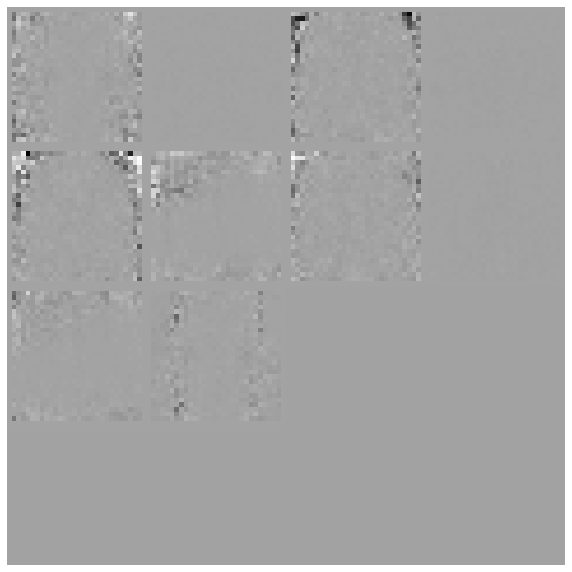

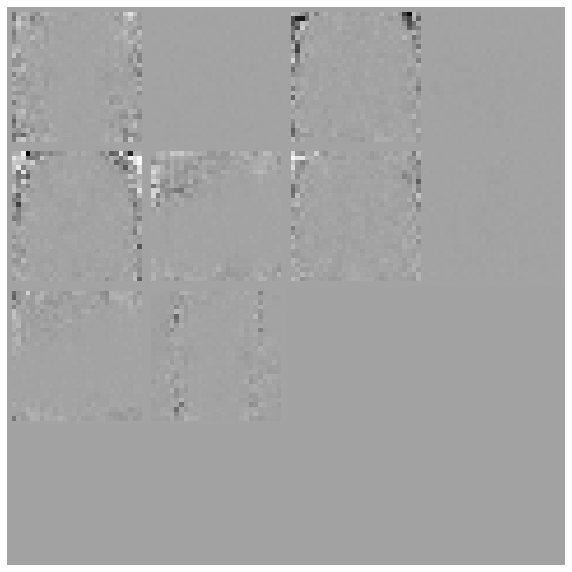

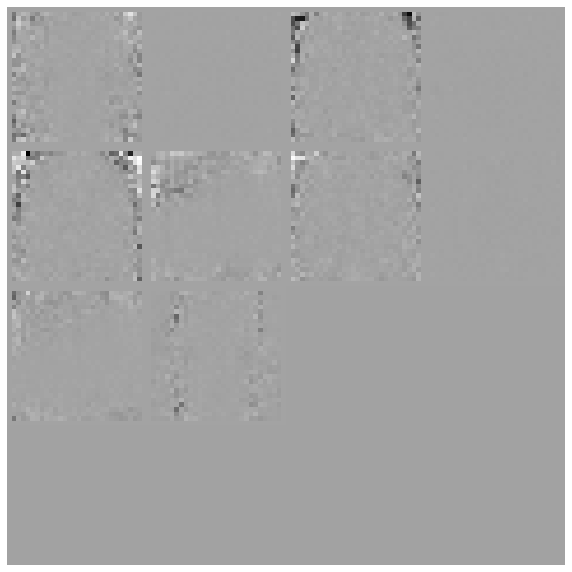

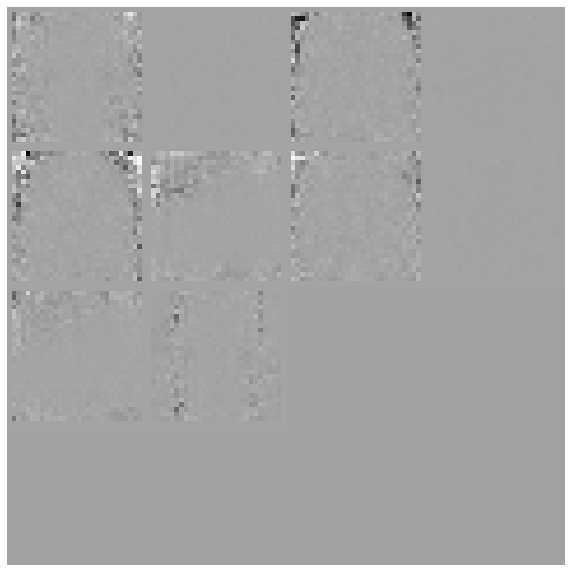

In [ ]:
wb.init(project="Simple_Linear_Adam_KMNIST");
c = wb.config

c.h = 0.01
c.b = 1024
c.epochs = 100000

w = [GPU(Truncated_Normal((784,10)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()

    if i % 1000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

https://playground.tensorflow.org


https://tensorspace.org/

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing